# Emitting Patterns 2D Projection

In this tutorial we show how to use the 2D projection tool.

The function used below needs the file ``xpsi/utilities/ProjectionTool.py``. <b>You can use this file and correspondent functions also without having  X-PSI installed. </b>

<h4> WARNING! If the code exits too many times through IpyExit, it will return an error and you may need to re-start the ipython notebook kernel </h4>

In [1]:
import os
import numpy as np
import math

from matplotlib import pyplot as plt

If you installed X-PSI, run the code below

In [2]:
import xpsi
from xpsi.utilities.ProjectionTool import plot_projection_general

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 0.3.1
Imported nestcheck version: 0.2.0


In [3]:
#Else run the code below 
# uncomment the lines below and substitute <root> with your path to your local clone of the X-PSI git repository
#!ln -s ../../xpsi/utilities/ProjectionTool.py .
#from ProjectionTool import plot_projection_general

X-PSI models have one or two hot spots.
According to the X-PSI naming convention we refer to them as the primary ('p') and secondary ('s'), in case two hot spots are modeled.


The ``plot_projection_general`` function takes at least 3 arguments:<br>
<ul>
  <li>**Input parameters [dict]**: in the form of X-PSI likelihood object or dictionary (for examples on use of the former see [Modeling tutorial](Modeling.html));</li>
  <li>**model [string]**: model describing the emission (this information overwrite the information given by the set of passed parameters);</li>
  <li>**Point Of View [string/list/vector]**: the projection requires the definition of a point of view. This is given as a string argument or as a 3D vector. The string argument describes points of view associated with the model. One that is common for every model is "I", this takes as entry the value associated to 'cos_incliation' as colatitude defining the center of the projection; in this case the phase is set to the X-PSI defined 0.0 phase. Other string possibilities depend on the model and could be "PE", origin of the projection set to the primary emitting component (when the primary has also an omitting component) or "P" or "S" if respectively the primary or the secondary has a single component. If the wrong entry is provided, suggestions are given; in general: the first letter P/S stands for primary/secondary; the second letter S/C stands for super/cede component (if a ceding component is present); E/O stand for emitting/omitting component (if an omitting component is present). It is also possible to give a vector (describing a point of the surface from the origin=center of the unitary sphere) as a point of view; that would direct the center of the projection to that point.</li>
</ul>


Additional optional arguments are: 
<ul>
  <li>**ThetaDisplay [string]**: plots in one hemisphere some circles, at equal distance in colatitude, to give an idea of the colatitude values, "SP" and "NP" for plotting them respectively with center "South pole" or "North pole"; if no argument is given, it takes the origin of the projection as reference point for drawing colatitude circles;
  <li>**antiphase [bool]**: replies to the question "Is the secondary hot spot defined with *anti-phase* on (i.e. defined from an origine 0.5 a cycle away from the origin of the primary hot spot)?" (yes=True; no = False -default)
  <li>**SaveFlag [bool]**: replies to the question "Do you want to save the figure?" (yes=True; no = False  - default)
  <li>**dir [string]**: name of the directory where to save the image, if SaveFlag = True (default "")
  <li>**Name [string]**: additional string to add to the name of the figure, if SaveFlag = True (default "")
  <li>**POVname [string]**: string specifying the point of view, added to the name of the figure, if SaveFlag = True (default "")
  <li>**extension [string]**: string specifying the extension of the figure (default ".png")
  <li>**antipodal [bool]**: replies to the question "Do you want to also plot a fictitious hot spot antipodal to the primary?" (yes=True; no = False - default)
</ul>

<h4> Please note that warnings produced with this tool do not cover all the extensive checks and conditions in place within X-PSI </h4>
For example there are no checks requiring the overlap of two components of the same hot spot and similarly there is no specific test (and therefore warning) checking if the superseding component is indeed in an "eccentric" location, if so specified by the model name. There are also no tests checking if the superseding or the omitting region completely covers the other component, unless the model is specified to be concentric.

In [4]:
%matplotlib inline

## TEST A) 1-hot spot models

<h3> TEST A.1) Testing 1 hot spot made of a single component </h3>

In [5]:
### setting the dictionary with a normal X-PSI set of parameters describing the likelihood objectd
### single temperature hot spot (more details over models and parameters can be found Riley et al. 2019)

labels_1hs = [
          'mass',                 # will not be used for the projection
          'radius',               # will not be used for the projection
          'cos_inclination',
          'p__phase_shift',
          'p__super_colatitude', 
          'p__super_radius', 
          'p__super_temperature', 
          'beta',                 # will not be used for the projection
          'column_density']       # will not be used for the projection

values_1hs = [ 1.2, 11,  0.8  ,  0.6,  1.9,
        0.08,  6.1,  9.3, 0.8]



P_dictionary_1hs =  dict(list(zip(labels_1hs, values_1hs)))

In [6]:
P_dictionary_1hs

{'mass': 1.2,
 'radius': 11,
 'cos_inclination': 0.8,
 'p__phase_shift': 0.6,
 'p__super_colatitude': 1.9,
 'p__super_radius': 0.08,
 'p__super_temperature': 6.1,
 'beta': 9.3,
 'column_density': 0.8}

Let us visualise the single temperature ("ST") hot spot, from the North Pole (POV in coordinate = [0,0,1]), with contours marking equal intervals in colatitude plotted on the north hemisphere ("NP").

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

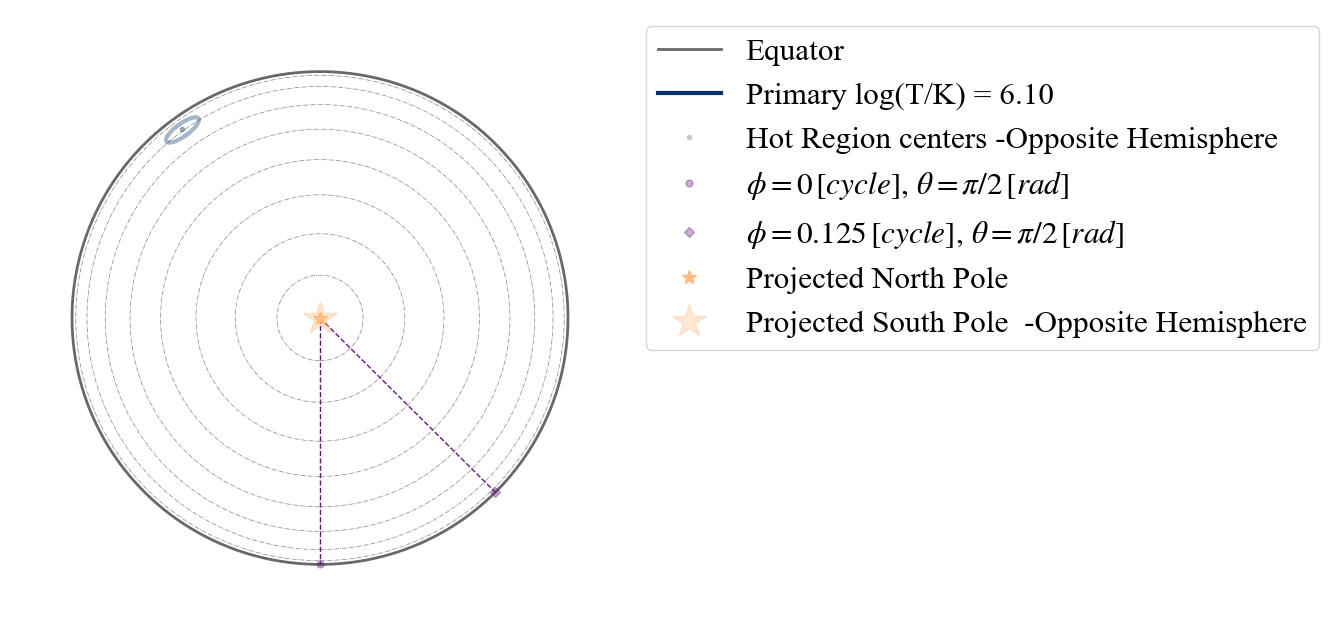

In [7]:
plot_projection_general((P_dictionary_1hs),"ST",[0,0,1],"NP")

Here the hot spot has a dimmer color than in the legend to signify it is located on the hemisphere opposite to the observer, assuming this point of view. <br>
To see the hot spot from the other hemisphere, let us choose as center of the projection the South Pole.

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

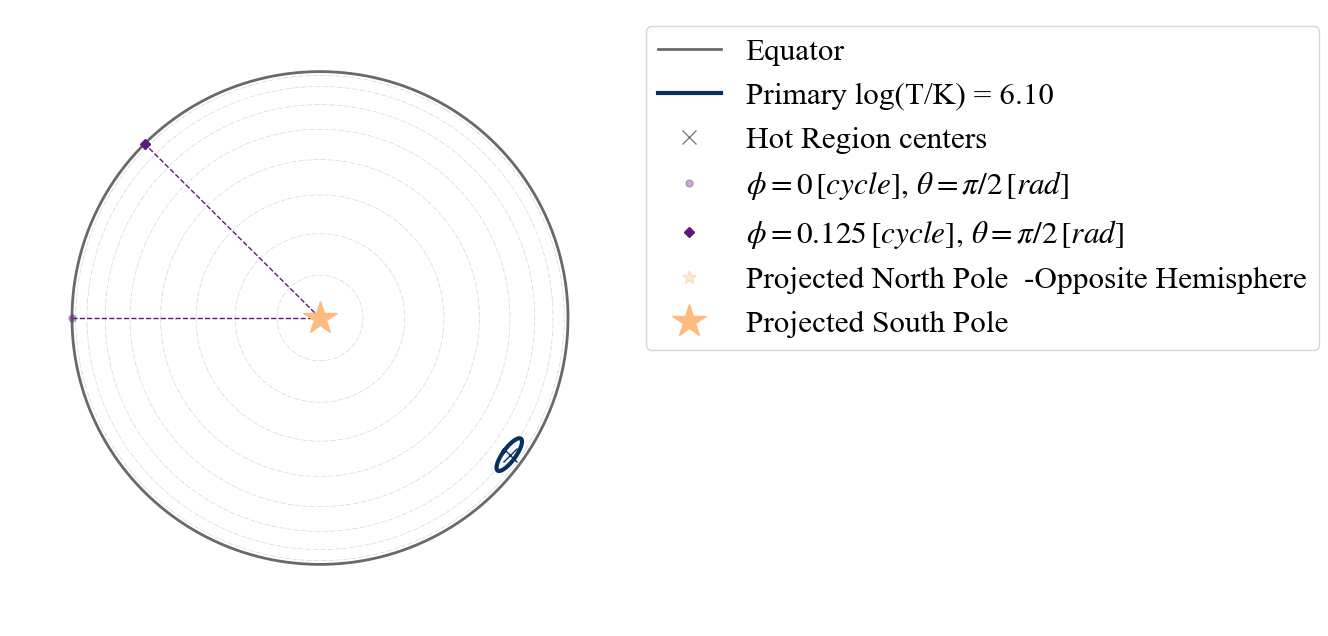

In [8]:
plot_projection_general((P_dictionary_1hs),"ST",[0.,0.,-1],"NP")

We can also change perspective, assuming as center of the projection the point identified by phase =0.0 (according to X-PSI definition) and colatitude correspondent to the Earth point of view.

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

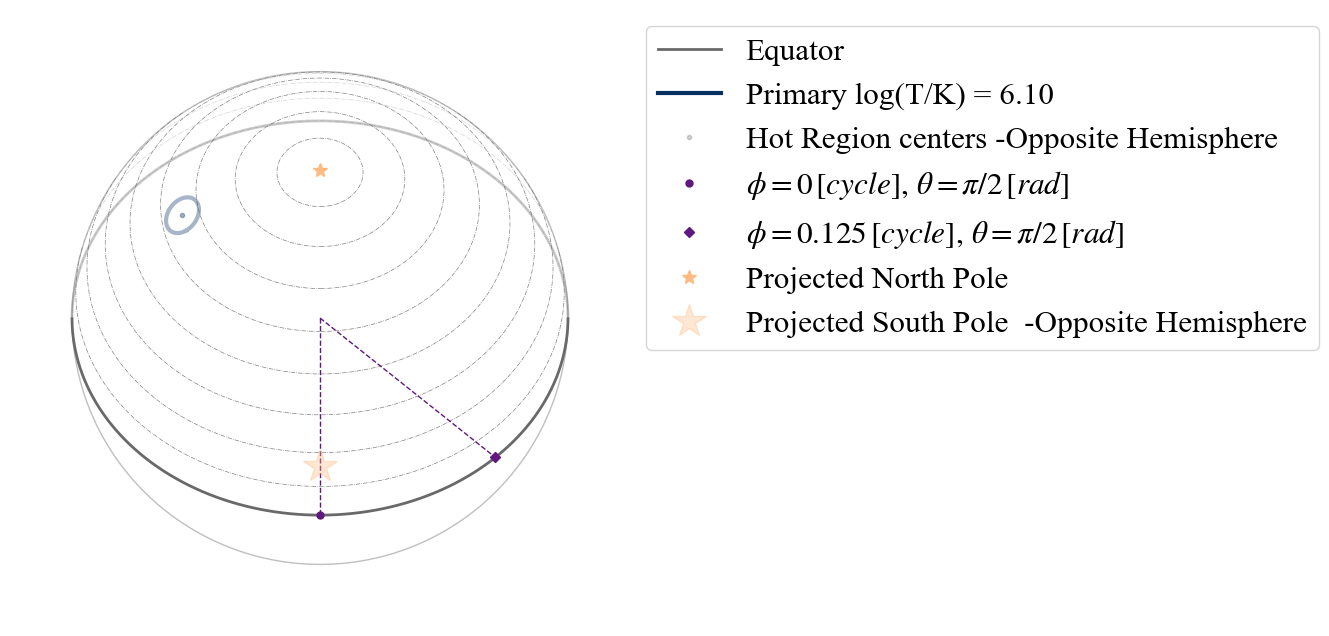

In [9]:
plot_projection_general((P_dictionary_1hs),"ST","I","NP")

If instead we assume as center of the projection the center of the hot spot, we see the following.

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

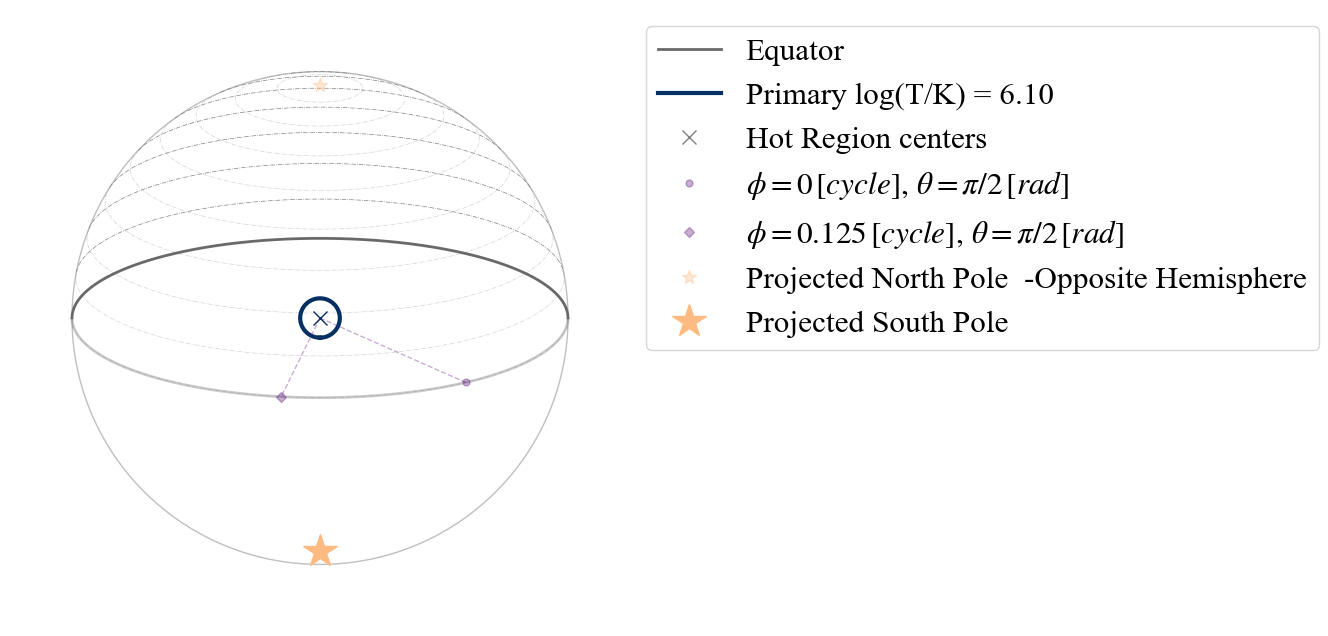

In [10]:
plot_projection_general((P_dictionary_1hs),"ST","P","NP")

Note that in all these plots the purple dotted lines always connect two points on the surface (at different phases, to show direction of rotation) to the center of the sphere (i.e. cutting through the star).

The contours at equally distanced colatitude can also be plotted on the South hemisphere, as shown below

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

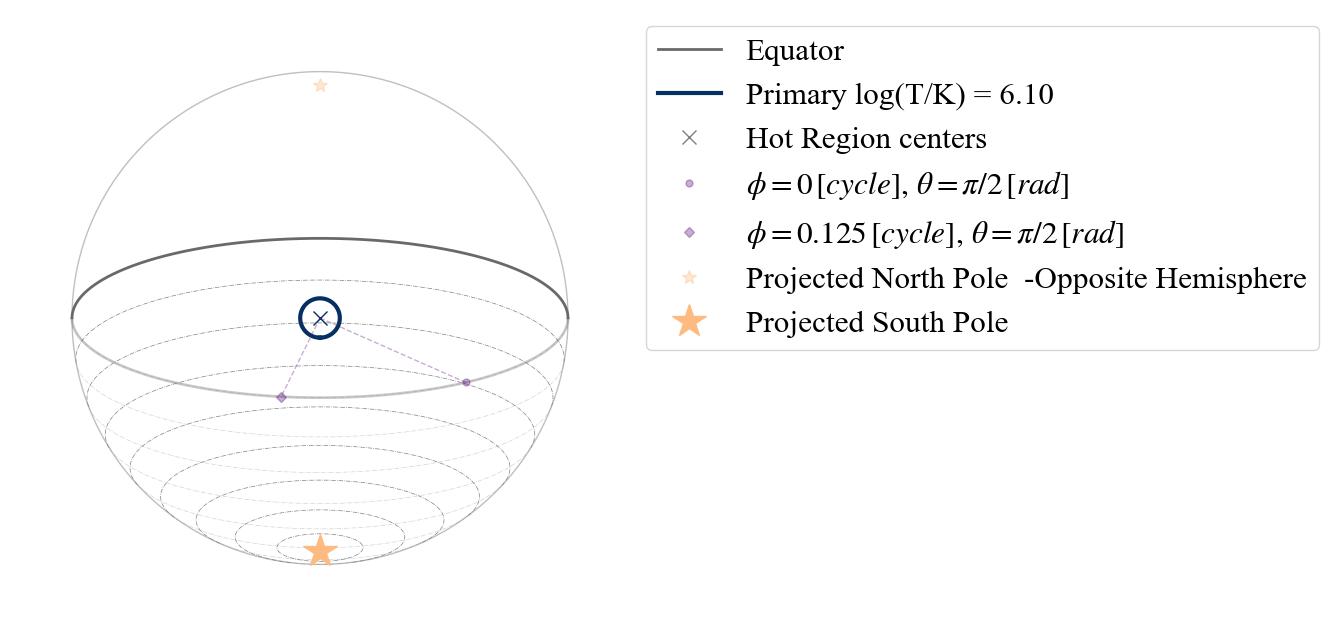

In [11]:
plot_projection_general((P_dictionary_1hs),"ST","P","SP")

We can also change these contours to start from the center of the projection, instead of form the poles, by leaving the argument empty.

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

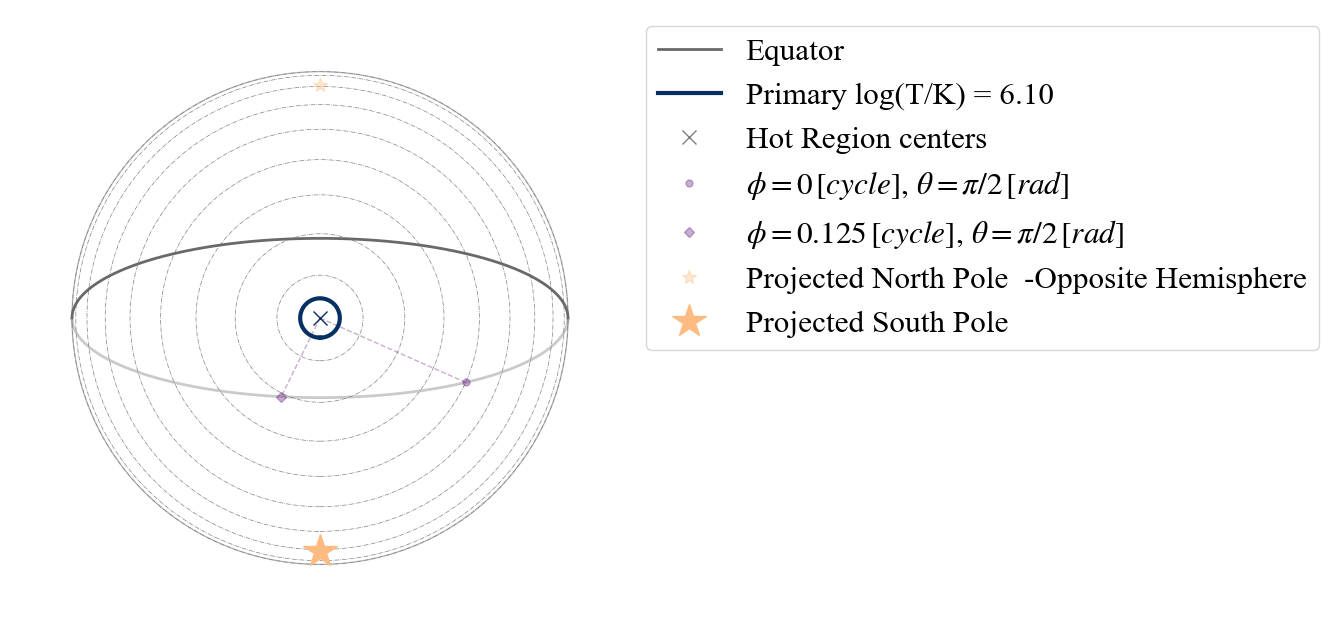

In [12]:
plot_projection_general((P_dictionary_1hs),"ST","P","")

If we want to check where a second, antipodal hot spot should be on the surface, we can adopt the ```antipodal``` option.

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

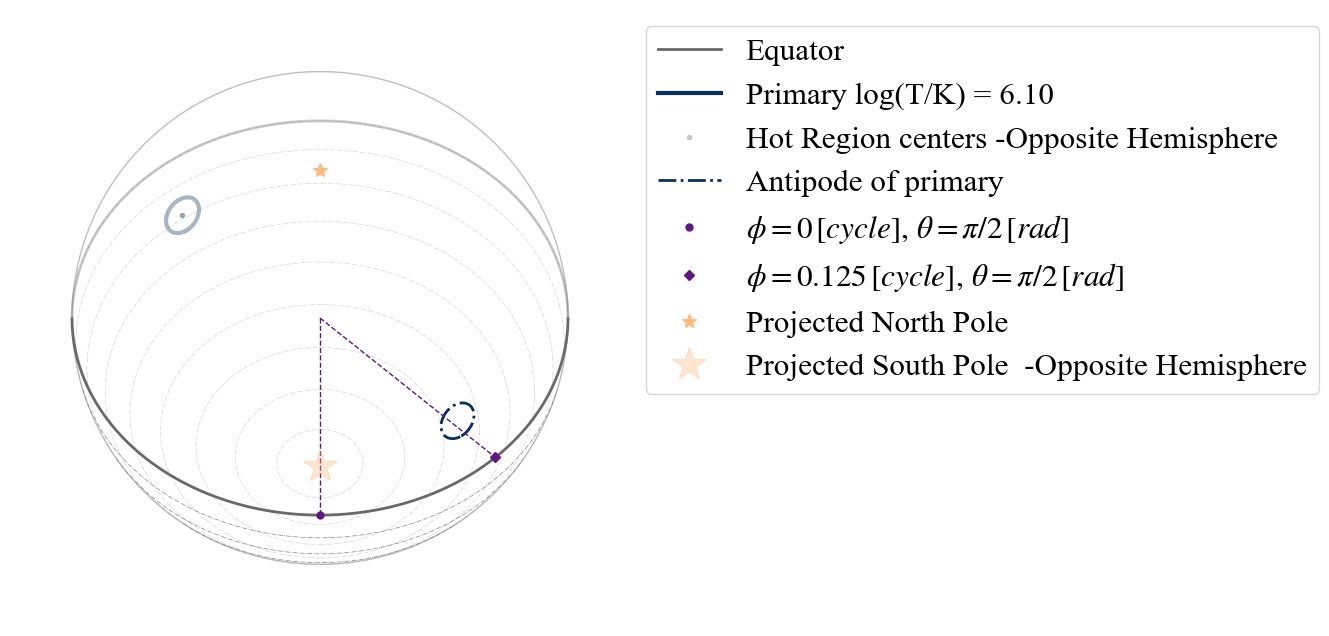

In [13]:
plot_projection_general((P_dictionary_1hs),"ST","I","SP",antipodal = True)

The antipodal hot spot is then drawn with a dash-dotted line of the same color of the primary (its antipodal hot spot).

<h3>TEST A.2) Testing 1 hot spot made of two emitting components</h3>

Let us now see the options and behaviour when the hot spot is composed of two different emitting components:

In [14]:
# setting the dictionary including the necessary parameters
labels = ['mass',   
          'radius', 
          'cos_inclination',
          'p__phase_shift',
          'p__super_colatitude',
          'p__super_radius',
          'p__super_temperature',
          'p__cede_colatitude',
          'p__cede_radius',
          'p__cede_azimuth',
          'p__cede_temperature',
          'beta',
          'column_density']

values_1hsDT = [ 1.2, 12,  0.8  ,  0.3,  0.1,  1.0,
        6.1,  0.5,  0.9, -0.4, 6.13, 9.3,
        0.8]

P_dictionary_1hsDT =  dict(list(zip(labels, values_1hsDT)))

In [15]:
P_dictionary_1hsDT

{'mass': 1.2,
 'radius': 12,
 'cos_inclination': 0.8,
 'p__phase_shift': 0.3,
 'p__super_colatitude': 0.1,
 'p__super_radius': 1.0,
 'p__super_temperature': 6.1,
 'p__cede_colatitude': 0.5,
 'p__cede_radius': 0.9,
 'p__cede_azimuth': -0.4,
 'p__cede_temperature': 6.13,
 'beta': 9.3,
 'column_density': 0.8}

According to our naming convention, this hot spot is a "PDT" = Protruding Double Temperature

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

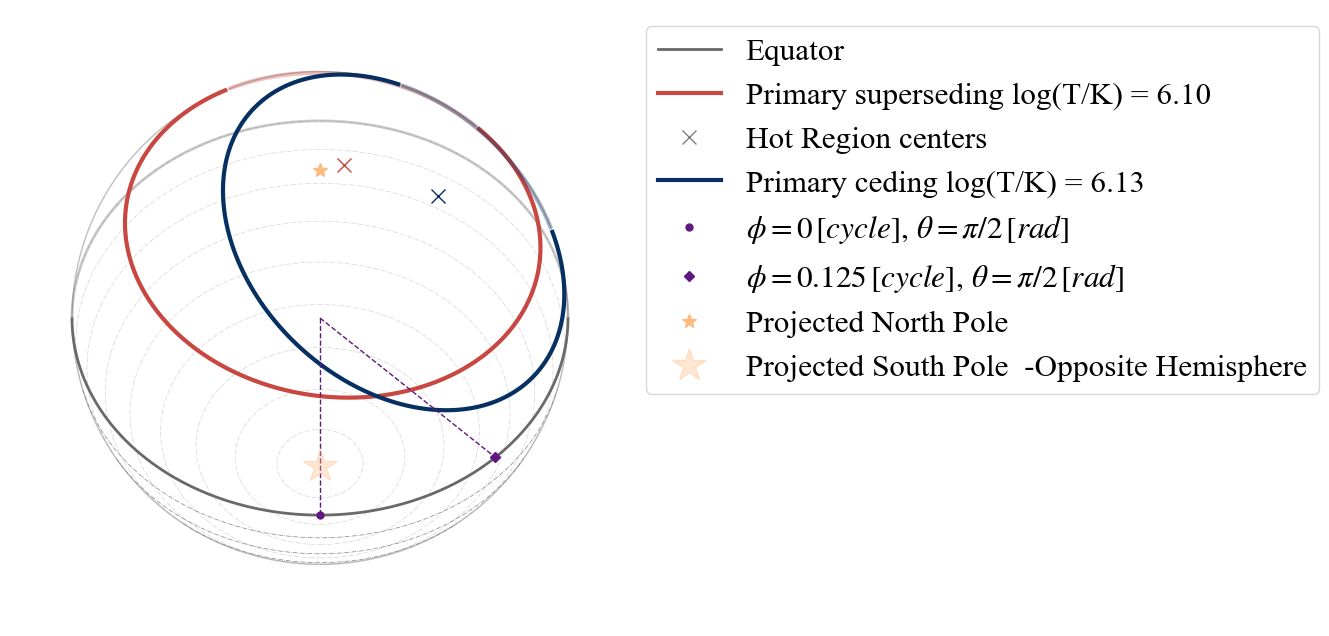

In [16]:
plot_projection_general((P_dictionary_1hsDT),"PDT","I","SP")

Other names for hot spots with two emitting components are "EDT" ('E' for Eccentric) and "CDT" ('C' for concentric). In this case none of these could be our model, according to the configurations allowed by X-PSI, as the superseding component should have a smaller radius than the ceding one in those cases. This is also confirmed by the appearing warning, if we try to set the model to "EDT".

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

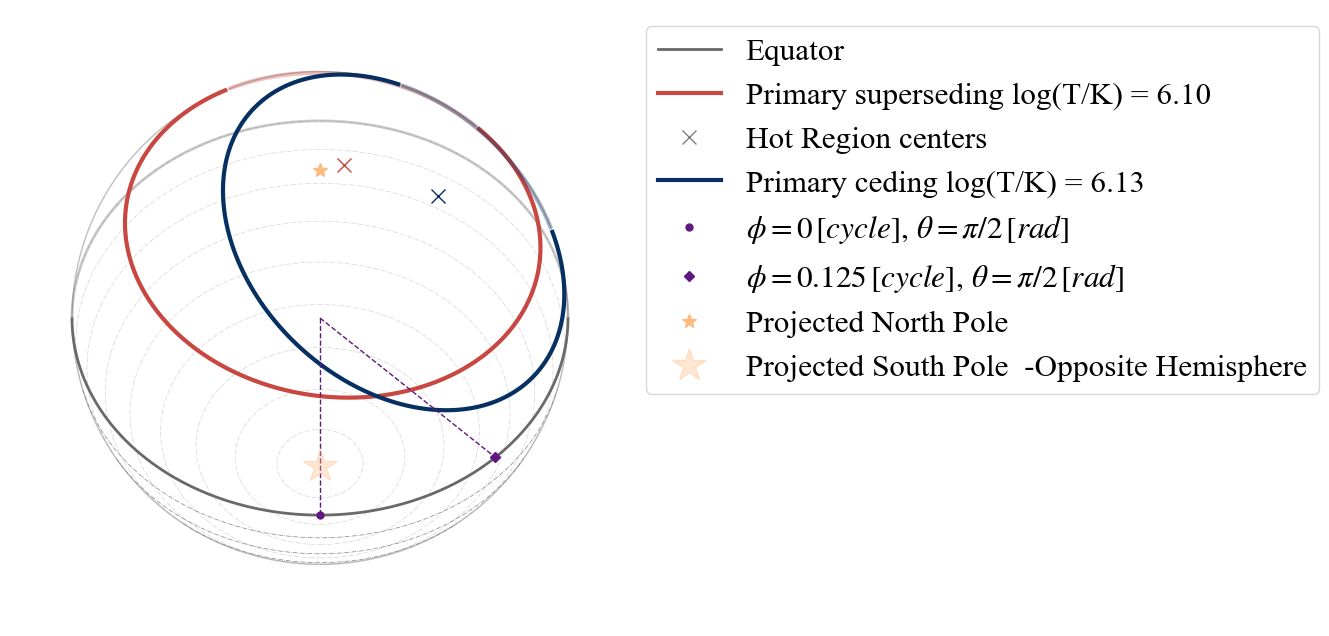

In [17]:
plot_projection_general((P_dictionary_1hsDT),"EDT","I","SP")

Let us also try to see what happens if we declare that the two emitting components of the hot spot are concentric (model="CDT").

YOU ARE USING 1 HOT SPOT MODEL
WARNING! there are info for a complex geometry, but they are not being used


<AxesSubplot: >

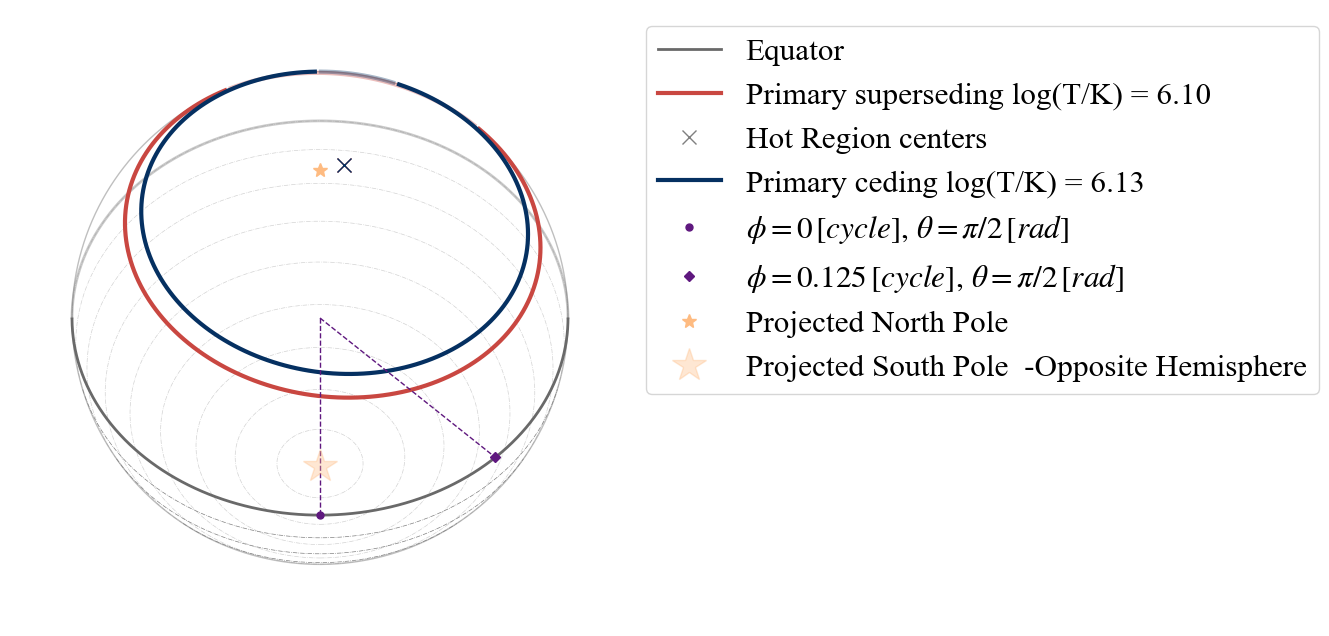

In [18]:
plot_projection_general((P_dictionary_1hsDT),"CDT","I","SP")

Note that in this case the configuration has changed: the two components are concentric as declared with the model name and the additional information given by the parameters are discarded. This is also shown by the first warning, which is telling us that there is some unused information. The second warning instead tells us that within X-PSI this configuration would not be possible since the superseding component completely masks the ceding one (making this more complex model equivalent to an "ST" model).  <br>
If we now change the radius of the superseding region, one of the warnings disappears.

YOU ARE USING 1 HOT SPOT MODEL
WARNING! there are info for a complex geometry, but they are not being used


<AxesSubplot: >

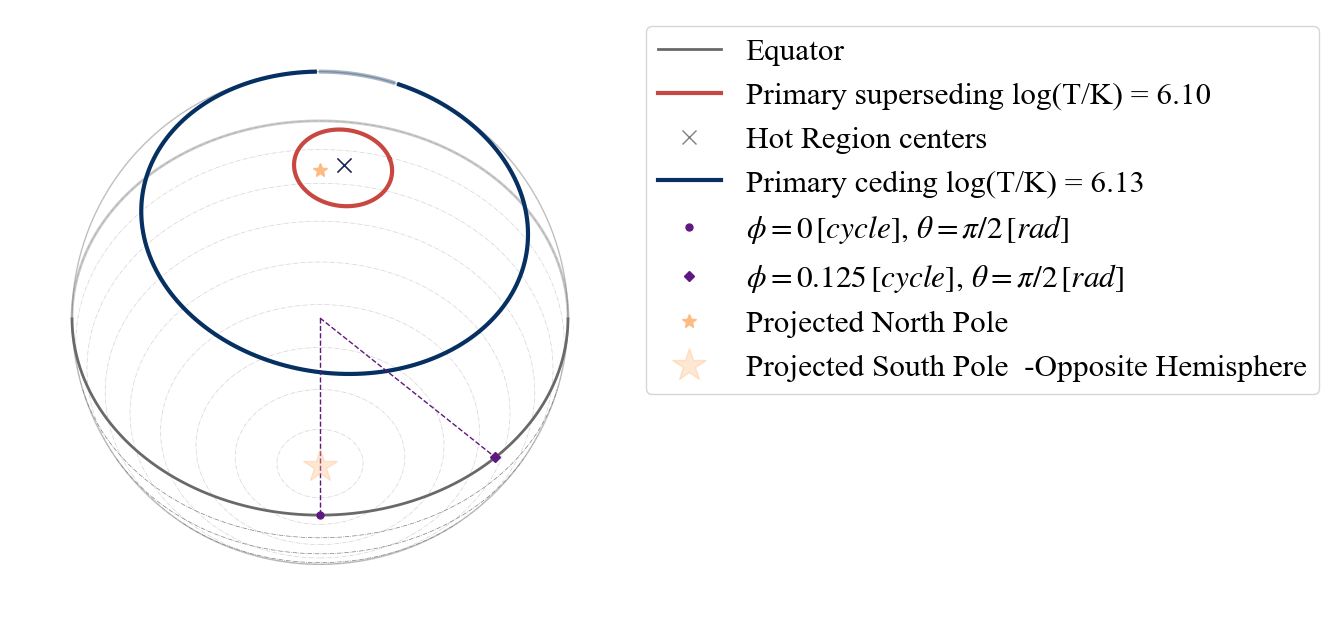

In [19]:
P_dictionary_1hsDT['p__super_radius'] = 0.2
plot_projection_general((P_dictionary_1hsDT),"CDT","I","SP")

With this dual temperature hot spot, we have different possibilities as points of view: "I"(inclination - from Earth),"PS" (primary superseding), "PC" (primary ceding).

In [20]:
# if we insert a wrong option, in the error message we get some suggestions: 
# uncomment and run the code below to see the error message
#plot_projection_general((P_dictionary_1hsDT),"PDT","P","SP")

YOU ARE USING 1 HOT SPOT MODEL
ERROR: point of view not allowed for this model!
      POSSIBILITIES are:  ['I', 'PS', 'PC']
exiting


IpyExit: 

YOU ARE USING 1 HOT SPOT MODEL
YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

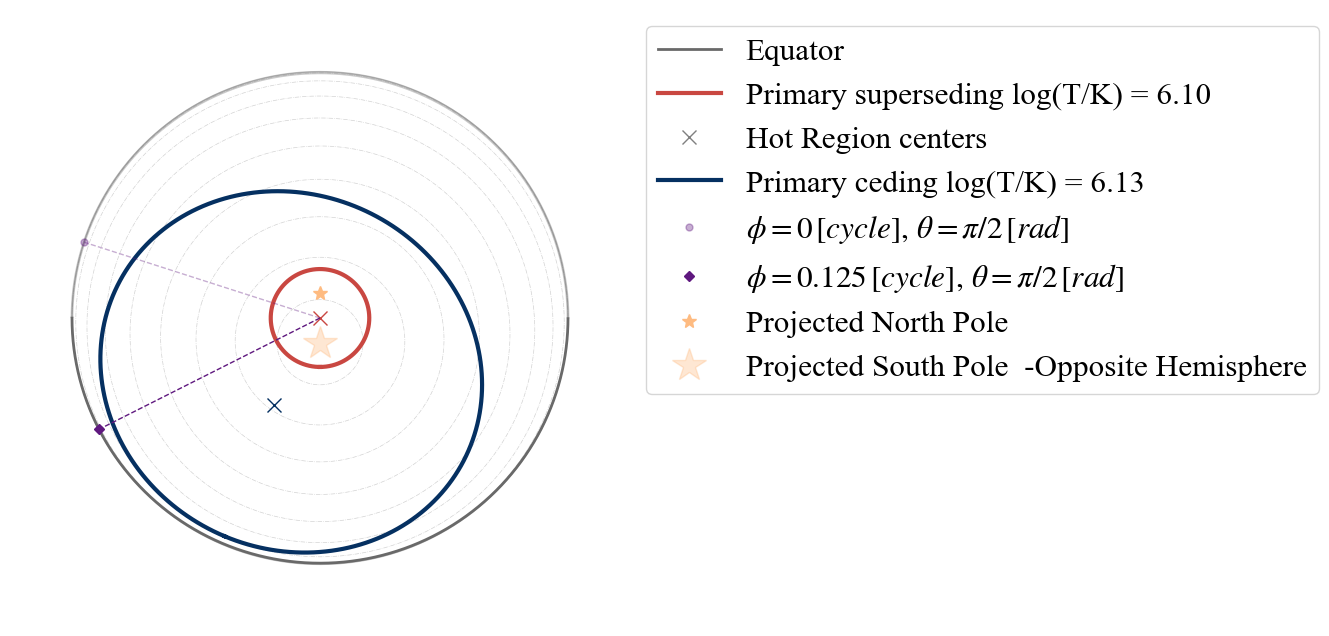

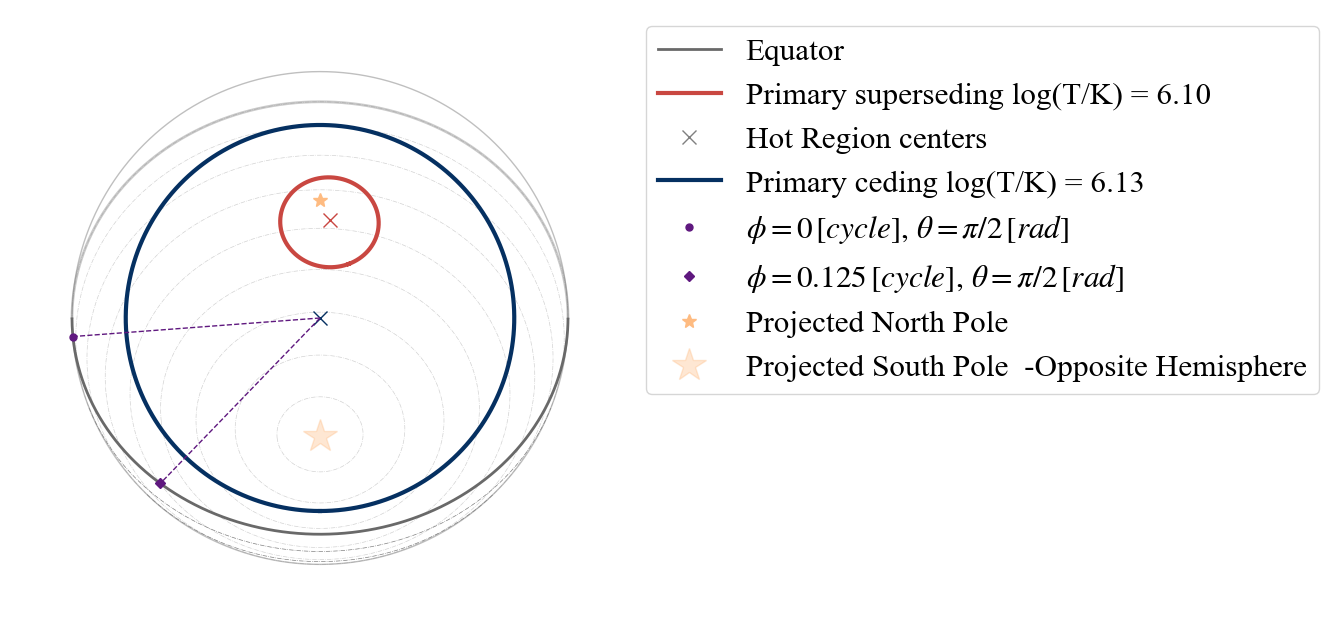

In [20]:
plot_projection_general((P_dictionary_1hsDT),"PDT","PS","SP")
plot_projection_general((P_dictionary_1hsDT),"PDT","PC","SP")

<h3> TEST A.3) Testing 1 hot spot made of one emitting and one omitting component</h3>

In [21]:
# setting the dictionary including the necessary parameters
labels = ['mass',   
          'radius', 
          'cos_inclination',
          'p__phase_shift',
          'p__super_colatitude',
          'p__super_radius',
          'p__super_temperature',
          'p__omit_colatitude',
          'p__omit_radius',
          'p__omit_azimuth',
          'beta',
          'column_density']

values_1hsPST = [ 1.2, 14,  0.8  ,  0.3,  0.1,  1.0,
        6.3,  0.5,  0.8, -0.4, 9.3,
        0.8]

P_dictionary_1hsPST =  dict(list(zip(labels, values_1hsPST)))

In [22]:
P_dictionary_1hsPST 

{'mass': 1.2,
 'radius': 14,
 'cos_inclination': 0.8,
 'p__phase_shift': 0.3,
 'p__super_colatitude': 0.1,
 'p__super_radius': 1.0,
 'p__super_temperature': 6.3,
 'p__omit_colatitude': 0.5,
 'p__omit_radius': 0.8,
 'p__omit_azimuth': -0.4,
 'beta': 9.3,
 'column_density': 0.8}

According to our naming convention, this hot spot is a "PST" = Protruding Single Temperature

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

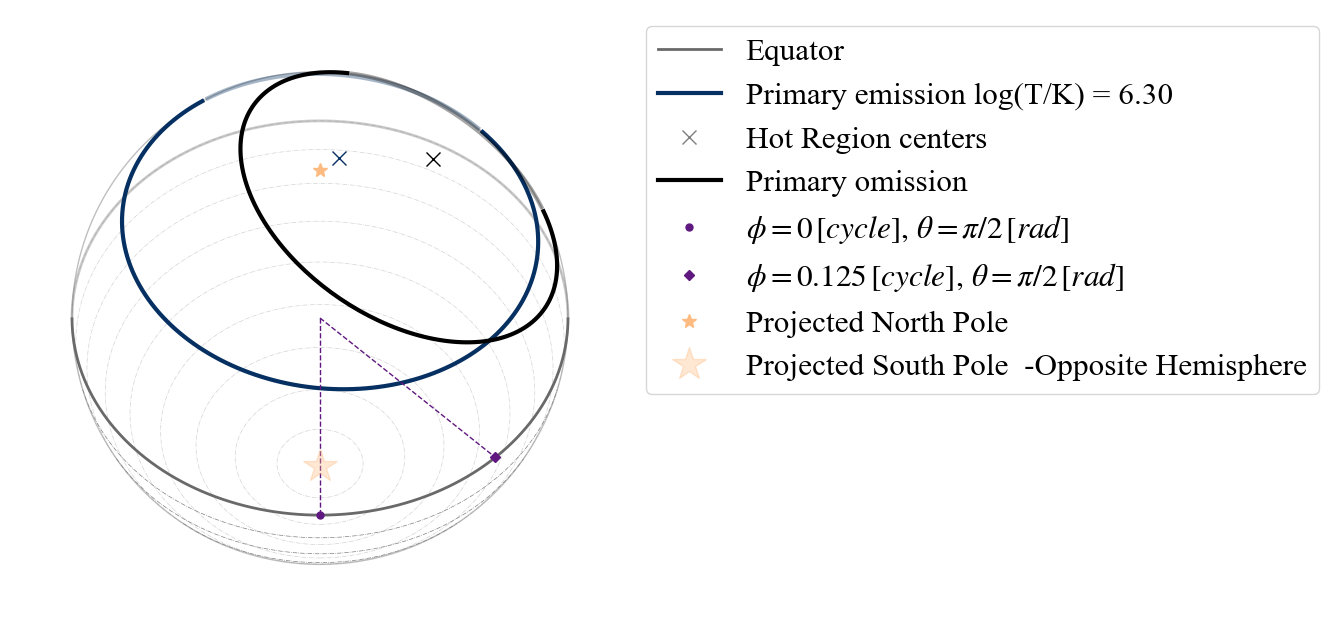

In [23]:
plot_projection_general((P_dictionary_1hsPST),"PST","I","SP")

The omitting is drawn in black. Note that these parameter values lead to the formation of an emitting arc, represented by the part of the blue circle not covered by the black one.

Again if we change declare a "CST" (Concentric Single Temperature) model, the information concerning the location if the omitting component on the surface will be discarded.


YOU ARE USING 1 HOT SPOT MODEL
WARNING! there are info for a complex geometry, but they are not being used


<AxesSubplot: >

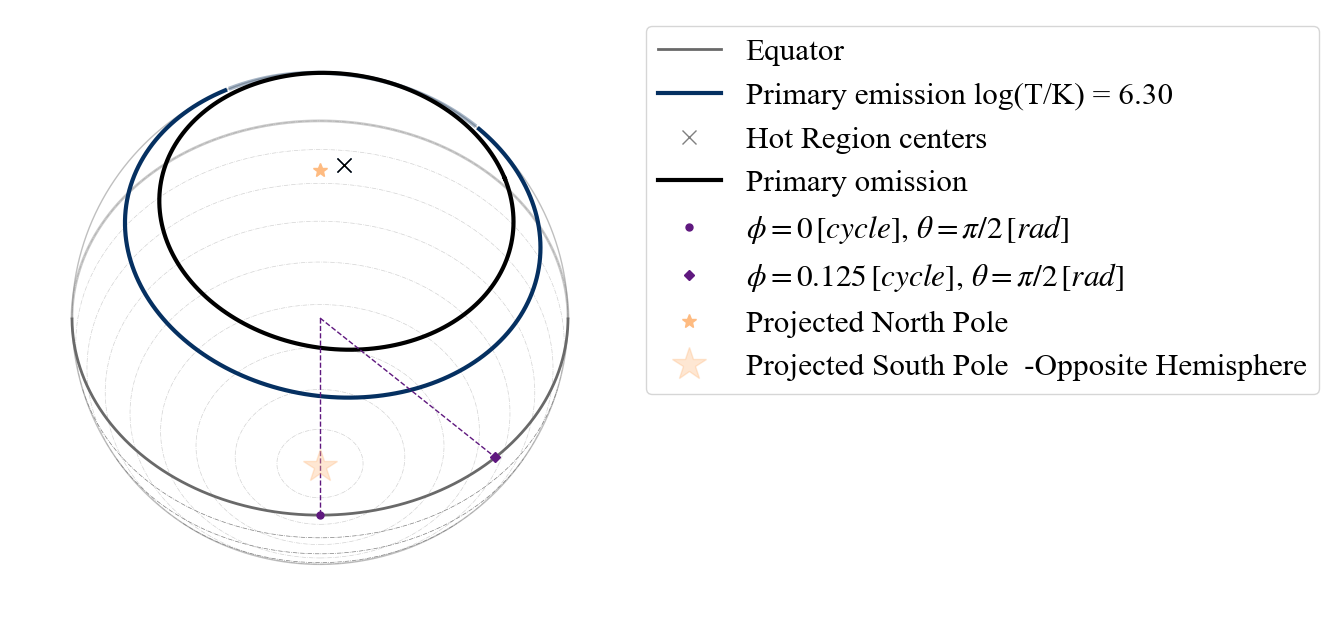

In [24]:
plot_projection_general((P_dictionary_1hsPST),"CST","I","SP")

and we get informed about it by the warning. <br>
Also in this case if the angular radius of the omitting region is larger then the emitting one, and the two components are concentric we get a warning telling us that the emitting region is all masked by the omitting region.

YOU ARE USING 1 HOT SPOT MODEL
WARNING! there are info for a complex geometry, but they are not being used


<AxesSubplot: >

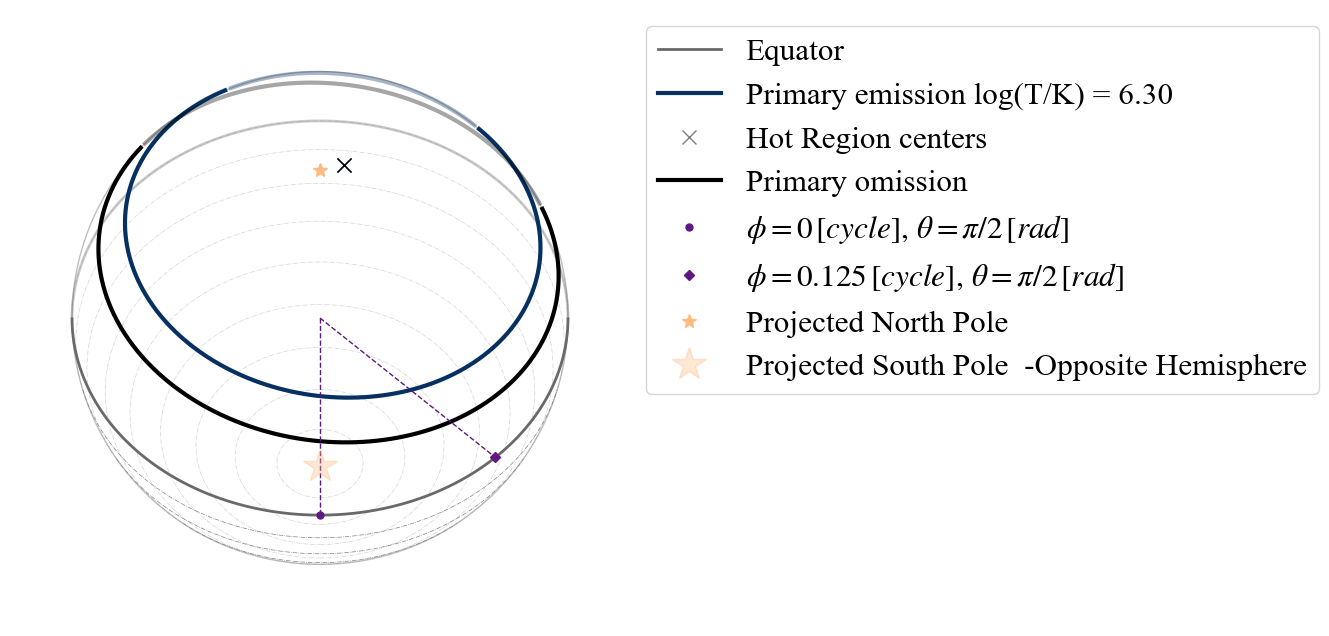

In [25]:
P_dictionary_1hsPST['p__omit_radius'] = 1.2
plot_projection_general((P_dictionary_1hsPST),"CST","I","SP")

Similarly to the case of the two emitting components, if we declare that this is an eccentric model ("EST" Eccentric Single Temperature), a warning will appear telling us that it does not reflect the criteria for being an eccentric configuration.

YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

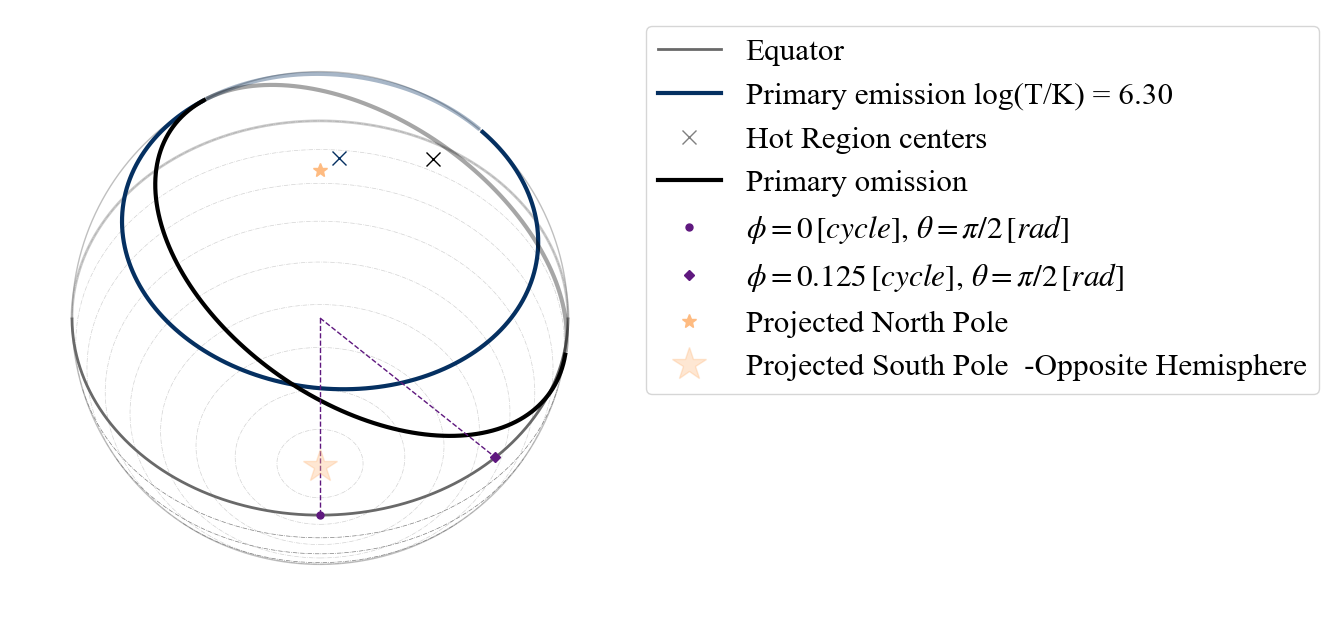

In [26]:
plot_projection_general((P_dictionary_1hsPST),"EST","I","SP")

A hot spot composed of a single emitting component and a masking one has different possibilities as points of view: "I"(inclination - from Earth),"PE" (primary emitting), "PO" (primary omitting). 
Again if the wrong point of view is used, the error message tells us that these are the possibilities.

YOU ARE USING 1 HOT SPOT MODEL
YOU ARE USING 1 HOT SPOT MODEL


<AxesSubplot: >

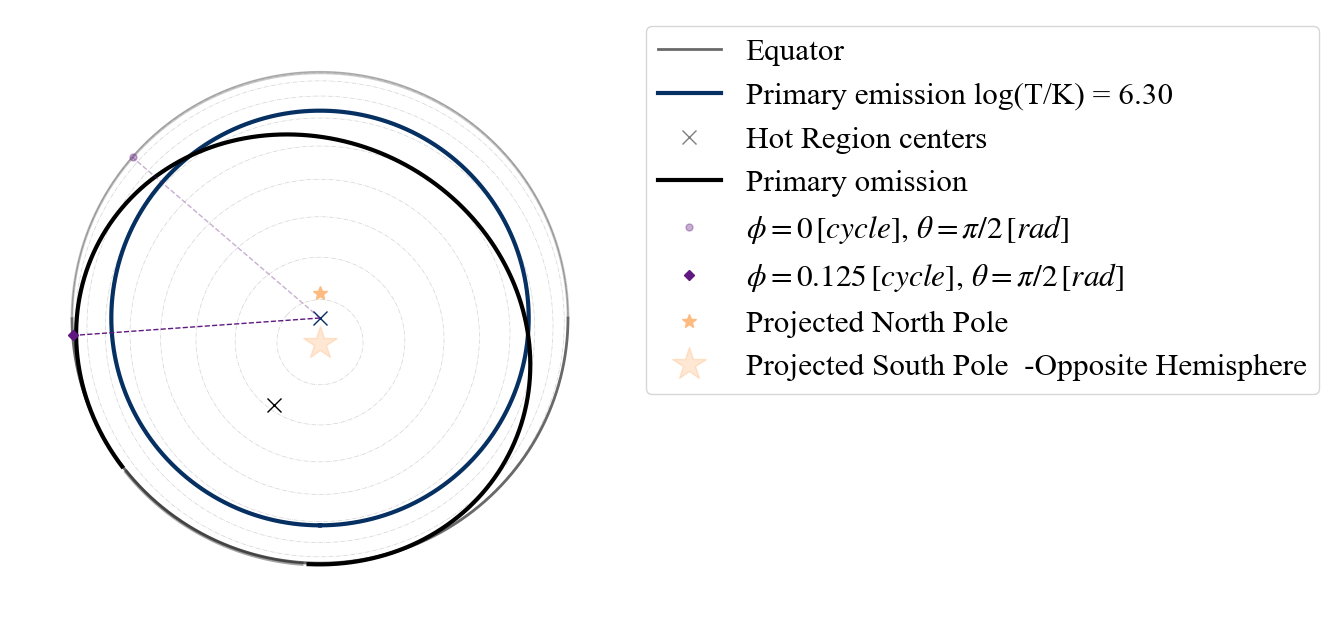

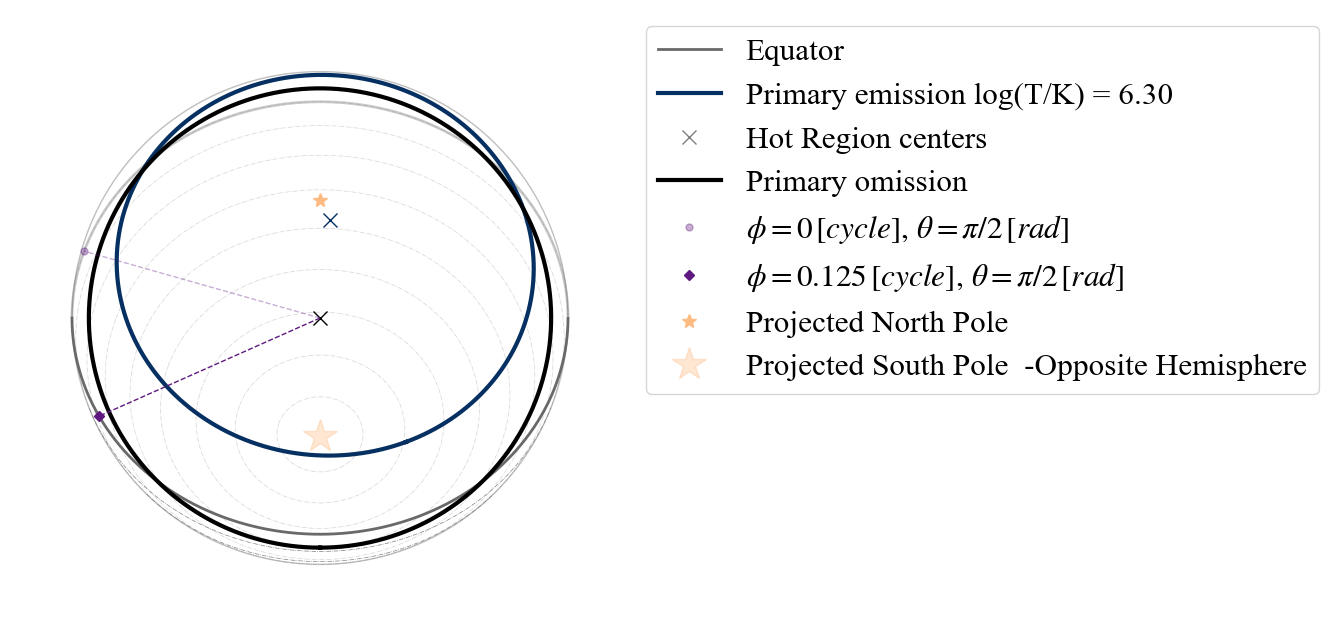

In [27]:
plot_projection_general((P_dictionary_1hsPST),"PST","PE","SP")
plot_projection_general((P_dictionary_1hsPST),"PST","PO","SP")

In [29]:
# uncomment the code below to see error message
# plot_projection_general((P_dictionary_1hsPST),"PST","PC","SP")

YOU ARE USING 1 HOT SPOT MODEL
ERROR: point of view not allowed for this model!
      POSSIBILITIES are:  ['I', 'PO', 'PE']
exiting


IpyExit: 

## TEST B) 2-hot spot models

In X-PSI we can also define models with 2 hot spots, a primary one and a secondary one.
According to the X-PSI naming convention, there are two way to build a two hot spot model: <br>
<ul>
  <li>using two hot spot with different associated name, e.g. ST and PST, that becomes ST+PST model;</li>
  <li>using the same geometry for both the hot spots, with the possible addition of restrictions on the parameter values of the secondary. We define them adding after the name of the hot spot:</li>
    <ul>
        <li><b>-S</b>: this means that all the properties of the secondary hot spot are derived from the properties of the primary hot spot; in particular we assume the secondary to have the same temperature and angular radius of the primary and to be antipodal respect to the primary.</li>
        <li><b>-Ua</b>: models ending in this way (as in Salmi et al. 2022 __ADD__LINK) constraint the secondary location to be antipodal to the primary but leaves the angular radius and temperature free.</li>
        <li><b>-U</b>: models ending in this way have no constraints on the properties of the secondary based on the ones of the primary.</li>
    </ul>
</ul>
Below we show some examples.

<h3>TEST B.1) Testing 2 hot spot models composed of different types of hot spots</h3>

In [28]:
# EXAMPLE: ST+PDT (primary composed of a single temperature component and 
#          secondary of a double temperature hot spot with protruding superseding component)
# setting the dictionary including the necessary parameters
labels = ['mass',   
          'radius', 
          'cos_inclination',
          'p__phase_shift',
          'p__super_colatitude', 
          'p__super_radius', 
          'p__super_temperature', 
          's__phase_shift',
          's__super_colatitude',
          's__super_radius',
          's__super_temperature',
          's__cede_colatitude',
          's__cede_radius',
          's__cede_azimuth',
          's__cede_temperature',
          'beta',
          'column_density']

values_2hsSTPDT = [ 1.2, 12,  0.2,  -0.05,  1.9,
        0.3,  6.1,  0.3,  2.9,  0.9,
        6.1,  2.5,  0.9, -0.4, 6.13, 9.3,
        0.8]

P_dictionary_2hsSTPDT =  dict(list(zip(labels, values_2hsSTPDT)))

In [29]:
P_dictionary_2hsSTPDT

{'mass': 1.2,
 'radius': 12,
 'cos_inclination': 0.2,
 'p__phase_shift': -0.05,
 'p__super_colatitude': 1.9,
 'p__super_radius': 0.3,
 'p__super_temperature': 6.1,
 's__phase_shift': 0.3,
 's__super_colatitude': 2.9,
 's__super_radius': 0.9,
 's__super_temperature': 6.1,
 's__cede_colatitude': 2.5,
 's__cede_radius': 0.9,
 's__cede_azimuth': -0.4,
 's__cede_temperature': 6.13,
 'beta': 9.3,
 'column_density': 0.8}

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

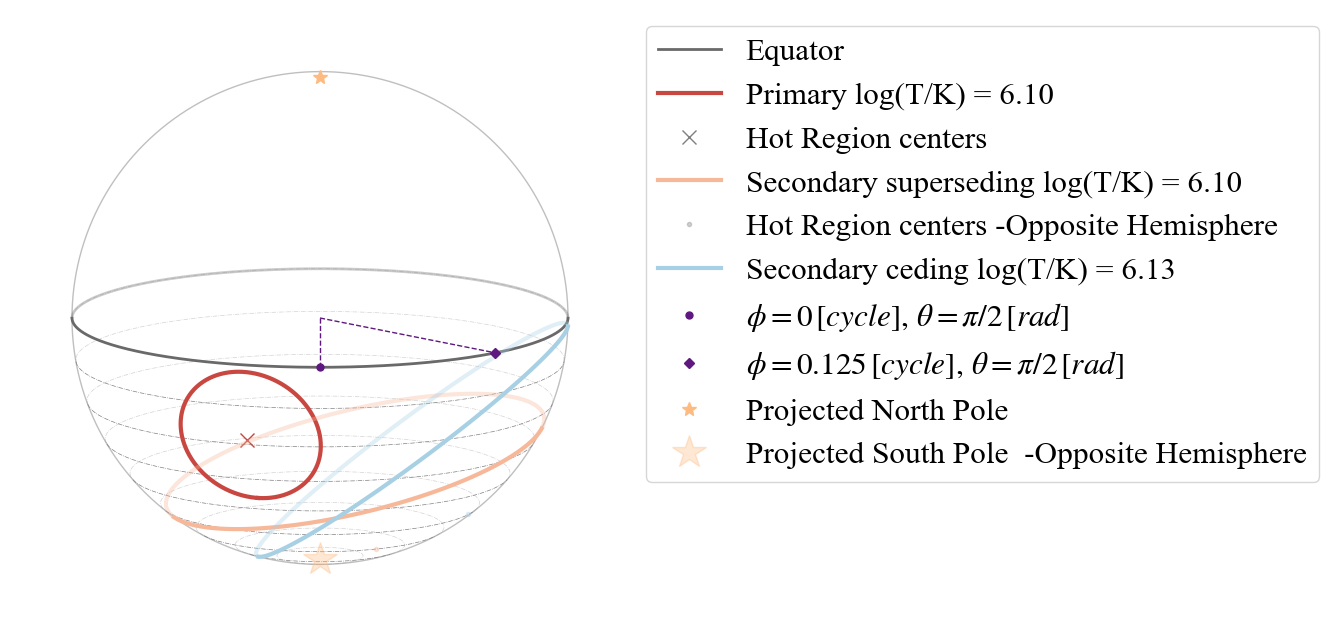

In [30]:
# from Earth and phase 0.
plot_projection_general((P_dictionary_2hsSTPDT),"ST+PDT","I","SP")

Now the allowed strings to set points of view are: "I" (Earth),"P" (primary center), "SS" (secondary superseding center) and "SC" (secondary ceding center). <br>
Below we show an example with "SS" and the antipodal function turned on.

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

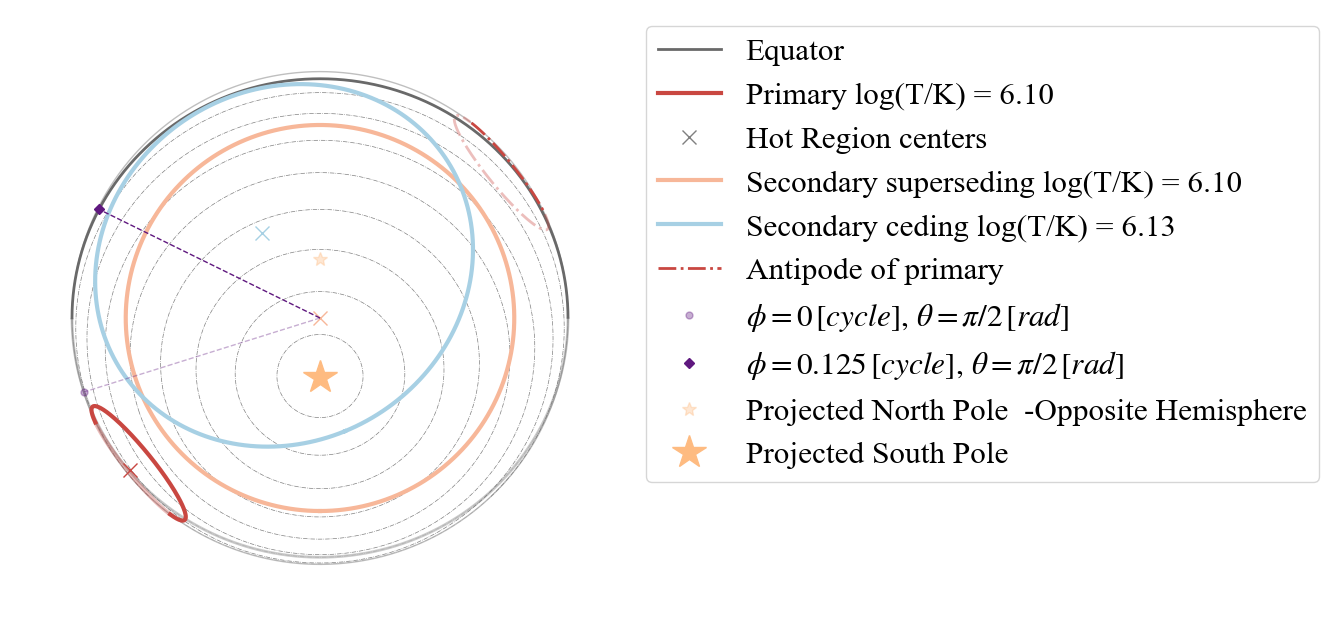

In [31]:
plot_projection_general((P_dictionary_2hsSTPDT),"ST+PDT","SS","SP", antipodal = True)

In [32]:
# ANOTHER EXAMPLE: ST+CST (primary composed of a single temperature component and 
#          secondary of a single temperature with two components one emitting and one omitting, 
#          concentric to the emitting one)
# setting the dictionary including the necessary parameters
labels = ['mass',   
          'radius', 
          'cos_inclination',
          'p__phase_shift',
          'p__super_colatitude', 
          'p__super_radius', 
          'p__super_temperature', 
          's__phase_shift',
          's__super_colatitude',
          's__super_radius',
          's__super_temperature',
          's__omit_radius',
          'beta',
          'column_density']

values_2hsSTCST = [ 1.4, 15,  0.25,  0.3,  0.7,
        0.3,  6.15,  -0.1,  1.8,  0.9,
        6.1,  0.4, 9.3,
        0.8]

P_dictionary_2hsSTCST =  dict(zip(labels, values_2hsSTCST))

In [33]:
P_dictionary_2hsSTCST

{'mass': 1.4,
 'radius': 15,
 'cos_inclination': 0.25,
 'p__phase_shift': 0.3,
 'p__super_colatitude': 0.7,
 'p__super_radius': 0.3,
 'p__super_temperature': 6.15,
 's__phase_shift': -0.1,
 's__super_colatitude': 1.8,
 's__super_radius': 0.9,
 's__super_temperature': 6.1,
 's__omit_radius': 0.4,
 'beta': 9.3,
 'column_density': 0.8}

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

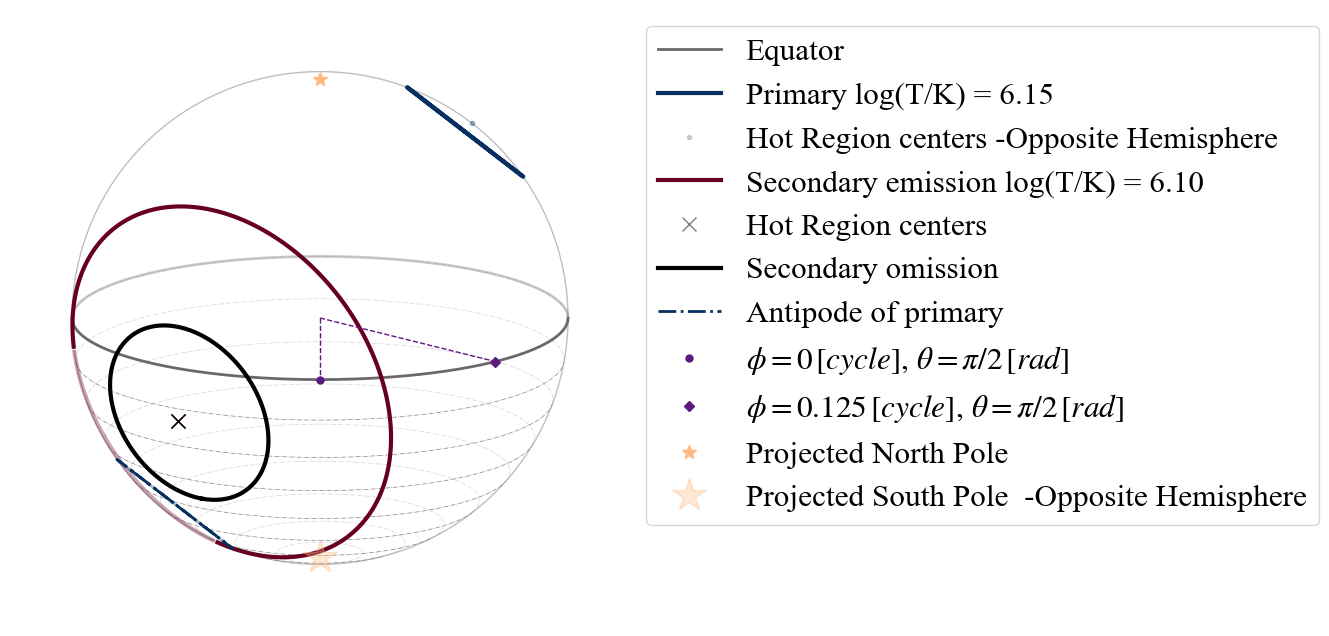

In [34]:
plot_projection_general((P_dictionary_2hsSTCST),"ST+CST","I","SP", antipodal = True)

So here we see for example that the secondary hot spot has the shape of a ring (this is the topology associated to CST hot spots). The image also show that the antipodal image of the primary hot spot would overlap with the secondary.

And again the allowed strings to set points of view are: "I" (Earth),"P" (primary center), "SE" (secondary emitting center) and "SO" (secondary omitting center). <br>


We can also exchange the primary with the secondary. Below an example where we then allowed the antipodal to be also drawn.

In [35]:
# setting the dictionary including the necessary parameters
labels = ['mass',   
          'radius', 
          'cos_inclination',
          's__phase_shift',
          's__super_colatitude', 
          's__super_radius', 
          's__super_temperature', 
          'p__phase_shift',
          'p__super_colatitude',
          'p__super_radius',
          'p__super_temperature',
          'p__omit_radius',
          'beta',
          'column_density']

values_2hsSTCST_2 = [ 1.4, 15,  0.25,  0.3,  0.7,
        0.3,  6.15,  -0.1,  1.8,  0.9,
        6.1,  0.4, 9.3,
        0.8]

P_dictionary_2hsSTCST_2 =  dict(zip(labels, values_2hsSTCST_2))

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

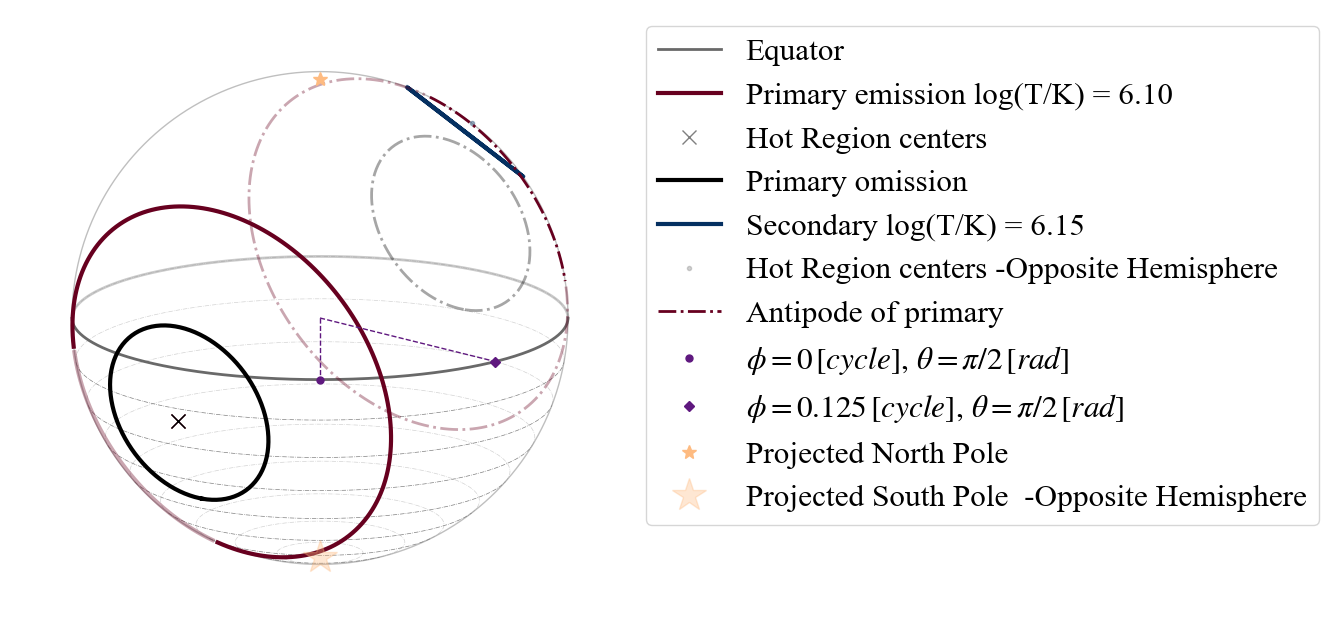

In [36]:
plot_projection_general((P_dictionary_2hsSTCST_2),"CST+ST","I","SP", antipodal = True)

Let us transform the CST in PST.

In [39]:
# uncomment and run the code below to see the error message
#plot_projection_general((P_dictionary_2hsSTCST_2),"PST+ST","I","SP", antipodal = True)

YOU ARE USING A 2 HOT SPOT MODEL
ERROR! Protruding and Eccentric models require the definition of cede colatitudes and phases
exiting


IpyExit: 

Of course we get an error, as we have not defined the colatitude and the azimouth of the omitting region!

In [37]:
# setting azimuth and colatitude for omitting component
            
labels = ['mass',   
          'radius', 
          'cos_inclination',
          's__phase_shift',
          's__super_colatitude', 
          's__super_radius', 
          's__super_temperature', 
          'p__phase_shift',
          'p__super_colatitude',
          'p__super_radius',
          'p__super_temperature',
          'p__omit_colatitude',
          'p__omit_radius',
          'p__omit_azimuth',
          'beta',
          'column_density']

values_2hsPSTST = [ 1.4, 15,  0.25,  0.3,  0.7,
        0.3,  6.15,  -0.1,  1.8,  0.9,
        6.1,  0.7, 0.4, -0.2, 9.3,
        0.8]

P_dictionary_2hsPSTST =  dict(zip(labels, values_2hsPSTST))

In [38]:
P_dictionary_2hsPSTST

{'mass': 1.4,
 'radius': 15,
 'cos_inclination': 0.25,
 's__phase_shift': 0.3,
 's__super_colatitude': 0.7,
 's__super_radius': 0.3,
 's__super_temperature': 6.15,
 'p__phase_shift': -0.1,
 'p__super_colatitude': 1.8,
 'p__super_radius': 0.9,
 'p__super_temperature': 6.1,
 'p__omit_colatitude': 0.7,
 'p__omit_radius': 0.4,
 'p__omit_azimuth': -0.2,
 'beta': 9.3,
 'column_density': 0.8}

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

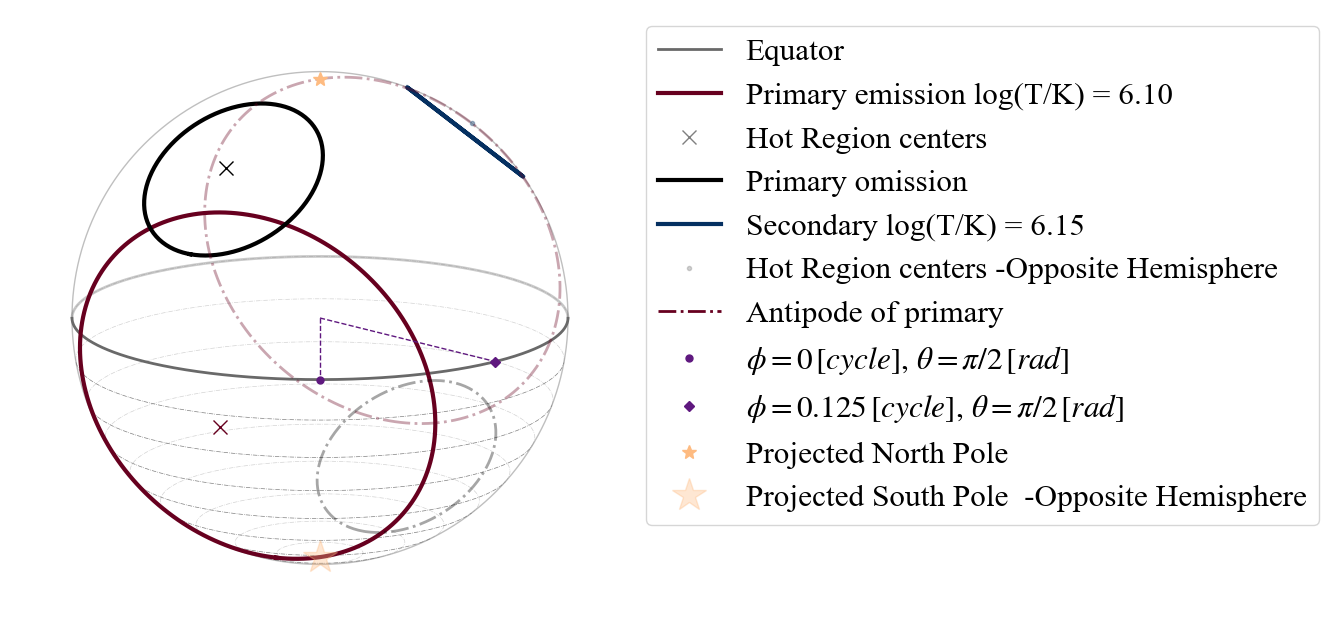

In [39]:
plot_projection_general((P_dictionary_2hsPSTST),"PST+ST","I","SP", antipodal = True)

<h3> TEST B.2.1) Testing 2 hot spot models composed of the same type of hot spot: symmetric case</h3>
Under this case, the string inputs recognised as points of view are only the ones relative to the primary hot spot.

Let us try to produce a 2 "ST" hot spot model. For this we can just use our initial 1 "ST" hot spot model and add to the model specification the "-S", since no further properties are needed.

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

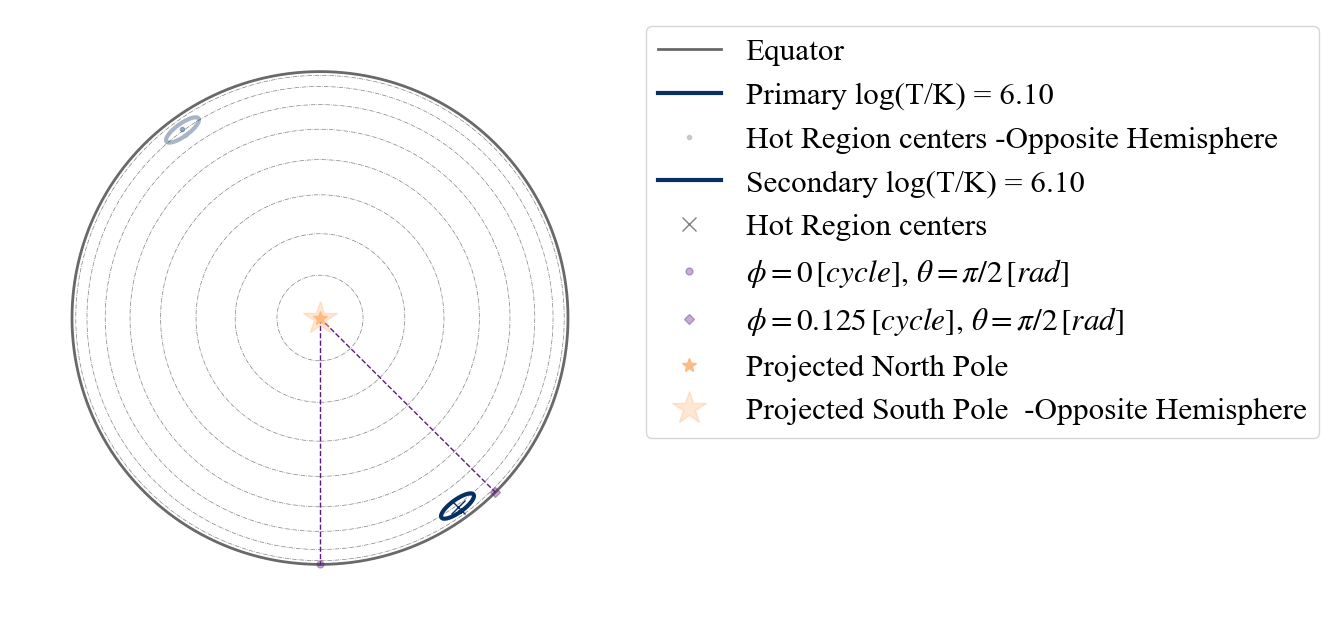

In [40]:
plot_projection_general((P_dictionary_1hs),"ST-S",[0,0,1],"NP")

Below is an example with a 1 "PST" hot spot model.

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

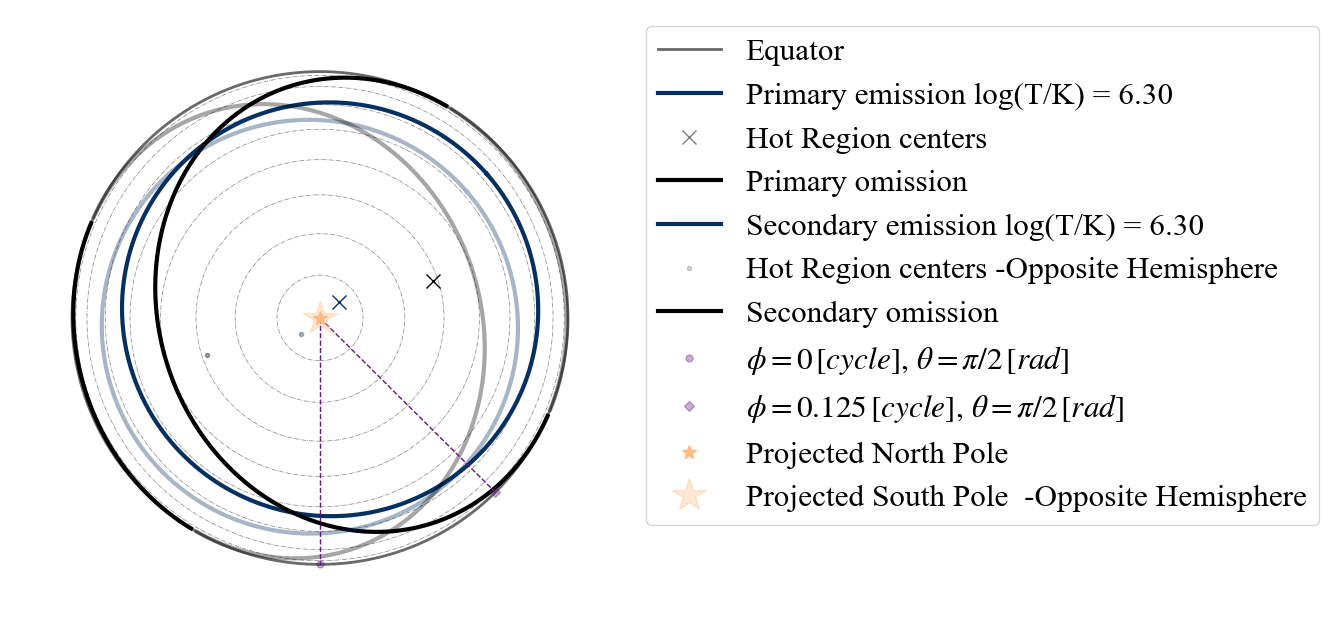

In [41]:
plot_projection_general((P_dictionary_1hsPST),"PST-S",[0,0,1],"NP")

The point of view allowed follow the same logic as if the model was "PST+PST", so we have: "I" (from Earth), "PE" (primary emitting center), "PO" (primary omitting center), "SE" (secondary emitting center) and "SO" (secondary omitting center. When in doubt you can still type "P" or "S" and if those do not work, the option will appear in the error message.

In [45]:
# uncomment and run the code below to see the error message
#plot_projection_general((P_dictionary_1hsPST),"PST-S","P","NP")

YOU ARE USING A 2 HOT SPOT MODEL
ERROR: point of view not allowed for this model!
      POSSIBILITIES are:  ['I', 'PO', 'PE', 'SO', 'SE']
exiting


IpyExit: 

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

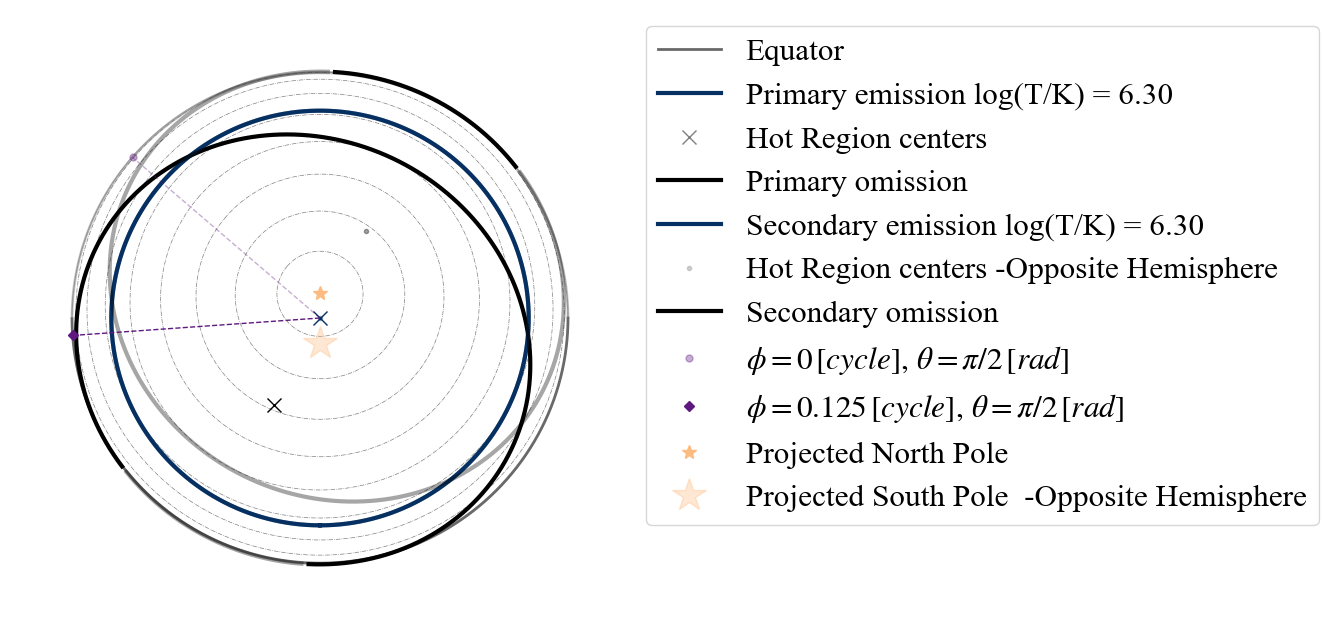

In [42]:
plot_projection_general((P_dictionary_1hsPST),"PST-S","PE","NP")

And if more parameter values are given, they will simply be discarded. For example if we use the "ST+PDT" model and we declare a "ST-S", below is what we get.

YOU ARE USING A 2 HOT SPOT MODEL
WARNING! there are info for a complex geometry, but they are not being used


<AxesSubplot: >

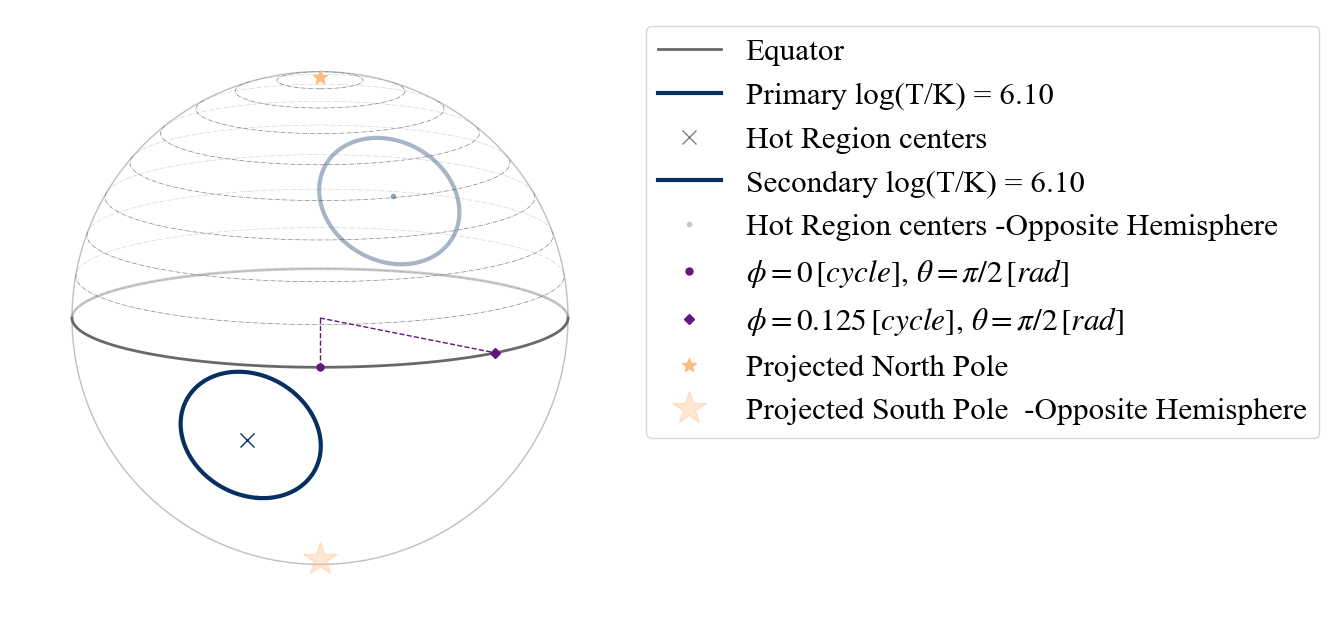

In [43]:
plot_projection_general((P_dictionary_2hsSTPDT),"ST-S","I","NP")

In [48]:
# Example of not allowed point of view as center of the secondary hot spot
# uncomment and run the code below to see the error message
# plot_projection_general((P_dictionary_1hsPST),"ST-S","S","NP")

YOU ARE USING A 2 HOT SPOT MODEL
WARNING! there are info for a complex geometry, but they are not being used
ERROR: point of view not allowed for this model!
      POSSIBILITIES are:  ['I', 'P']
exiting


IpyExit: 

<h3> TEST B.2.2) Testing 2 hot spot models composed of the same type of hot spot: antipodal case</h3>

This case represents the 2 hot spot model where the secondary hot spot is constrained to be located at the antipode of the primary. Let us first define a 2 "ST" hot spot model, where the hot spots have independent properties from each other. Also in this case the string entries accepted as points of view are limited to the ones allowed by the configuration of the primary.

In [44]:
# setting azinouth and colatitude for omitting component
labels = ['mass',   
          'radius', 
          'cos_inclination',
          's__super_radius', 
          's__super_temperature', 
          'p__phase_shift',
          'p__super_colatitude',
          'p__super_radius',
          'p__super_temperature',
          'beta',
          'column_density']

values_2hsSTUa = [ 1.4, 15,  0.25, 
        0.3,  6.15,  -0.1,  1.8,  0.9,
        6.1, 9.3, 0.8]

P_dictionary_2hsSTUa =  dict(zip(labels, values_2hsSTUa))

In [45]:
P_dictionary_2hsSTUa

{'mass': 1.4,
 'radius': 15,
 'cos_inclination': 0.25,
 's__super_radius': 0.3,
 's__super_temperature': 6.15,
 'p__phase_shift': -0.1,
 'p__super_colatitude': 1.8,
 'p__super_radius': 0.9,
 'p__super_temperature': 6.1,
 'beta': 9.3,
 'column_density': 0.8}

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

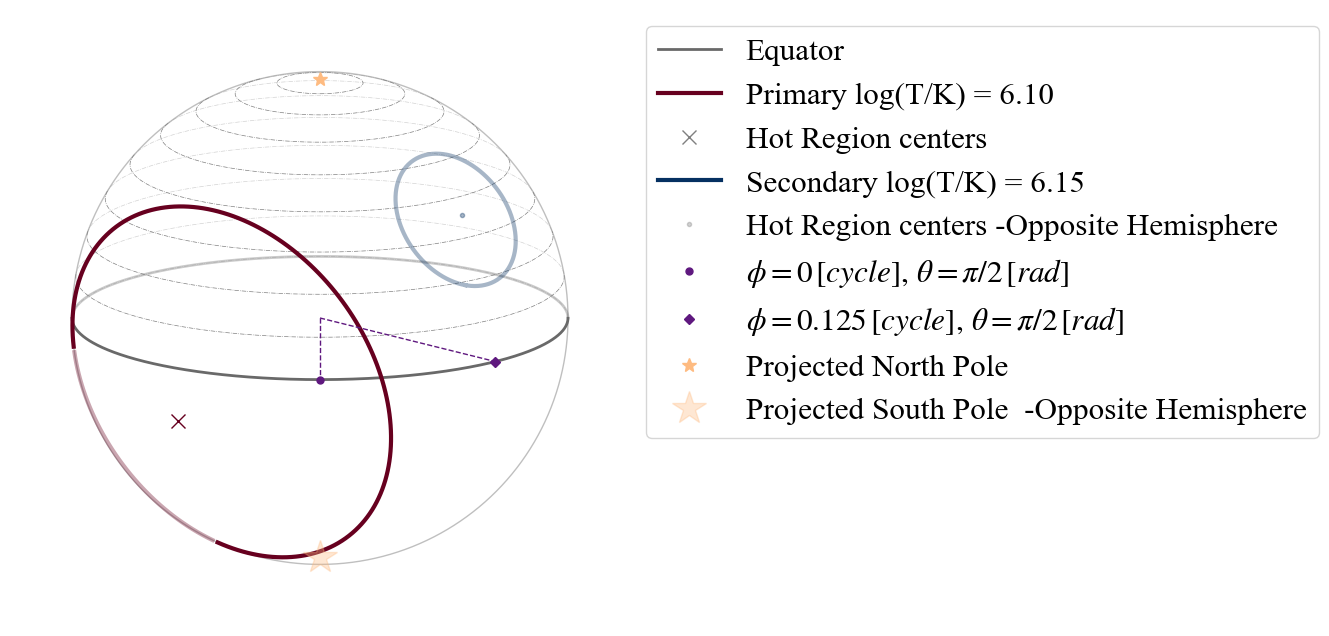

In [46]:
plot_projection_general((P_dictionary_2hsSTUa),"ST-Ua","I","NP")

In [52]:
# Example of point of view not allowed (in the error message you see that for this specific case the only)
# string entries allowed as points of view are "P" and "I".
# Uncomment and run the code below to see the error message
#plot_projection_general((P_dictionary_2hsSTUa),"ST-S","S","NP")

YOU ARE USING A 2 HOT SPOT MODEL
WARNING! there are info for a complex geometry, but they are not being used
ERROR: point of view not allowed for this model!
      POSSIBILITIES are:  ['I', 'P']
exiting


IpyExit: 

YOU ARE USING A 2 HOT SPOT MODEL
WARNING! there are info for a complex geometry, but they are not being used


<AxesSubplot: >

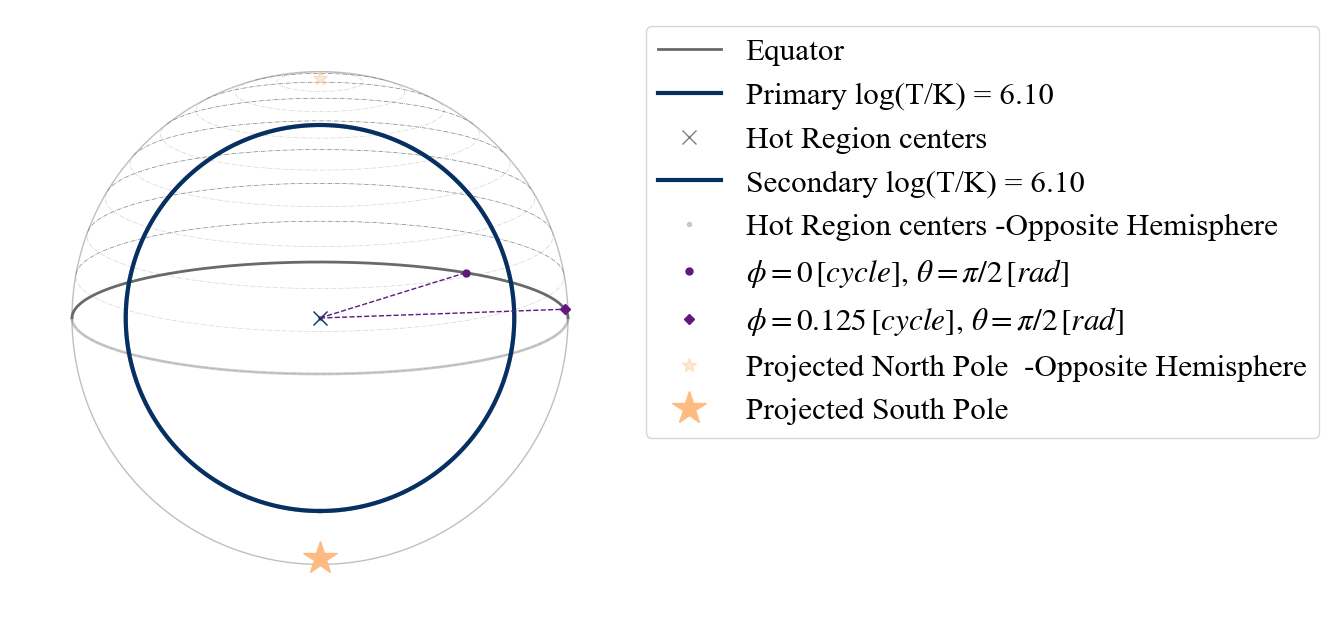

In [47]:
# And here is an example of a point of view another allowed 
# (note that you do not see the secondary as it is completely covered by the primary).
plot_projection_general((P_dictionary_2hsSTUa),"ST-S","P","NP")

If we do not specify temperature and/or angular radius of the secondary, the code will not allow us to still try to use the "-Ua" vector.

In [30]:
# uncomment and run the code below to see the error message
#plot_projection_general((P_dictionary_1hs),"ST-Ua",[0,0,1],"NP")

YOU ARE USING A 2 HOT SPOT MODEL
ERROR! super properties required for 's' hot spot ('p' = primary; 's' = secondary and '' for single hot spot model)
exiting


IpyExit: 

<h3> TEST B.2.3) Testing 2 hot spot models composed of the same type of hot spot: uncorrelated case<h3>

In this case, the two hot spots of the model have the same name but their properties are completely uncorrelated. This is equivalent in writing twice the hot spot name divided by "+" (e.g. "ST-U" is equivalent to "ST+ST"). In case there are more different derived parameters between the two hot spots, the suggestion is to add the correspondent parameters in the dictionary and effectively convert your model to a "-U" model. In this case the points of view allowed through include centers of the primary as well of the secondary components.

In [48]:
# EXAMPLE: ST-U, setting parameter values
labels = ['mass',   
          'radius', 
          'cos_inclination',
          's__phase_shift',
          's__super_colatitude', 
          's__super_radius', 
          's__super_temperature', 
          'p__phase_shift',
          'p__super_colatitude',
          'p__super_radius',
          'p__super_temperature',
          'beta',
          'column_density']

values_2hsSTU = [ 1.4, 15,  0.25,  0.3,  0.7,
        0.3,  6.15,  -0.1,  1.8,  0.9,
        6.1, 9.3, 0.8]

P_dictionary_2hsSTU =  dict(zip(labels, values_2hsSTU))

In [49]:
P_dictionary_2hsSTU

{'mass': 1.4,
 'radius': 15,
 'cos_inclination': 0.25,
 's__phase_shift': 0.3,
 's__super_colatitude': 0.7,
 's__super_radius': 0.3,
 's__super_temperature': 6.15,
 'p__phase_shift': -0.1,
 'p__super_colatitude': 1.8,
 'p__super_radius': 0.9,
 'p__super_temperature': 6.1,
 'beta': 9.3,
 'column_density': 0.8}

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

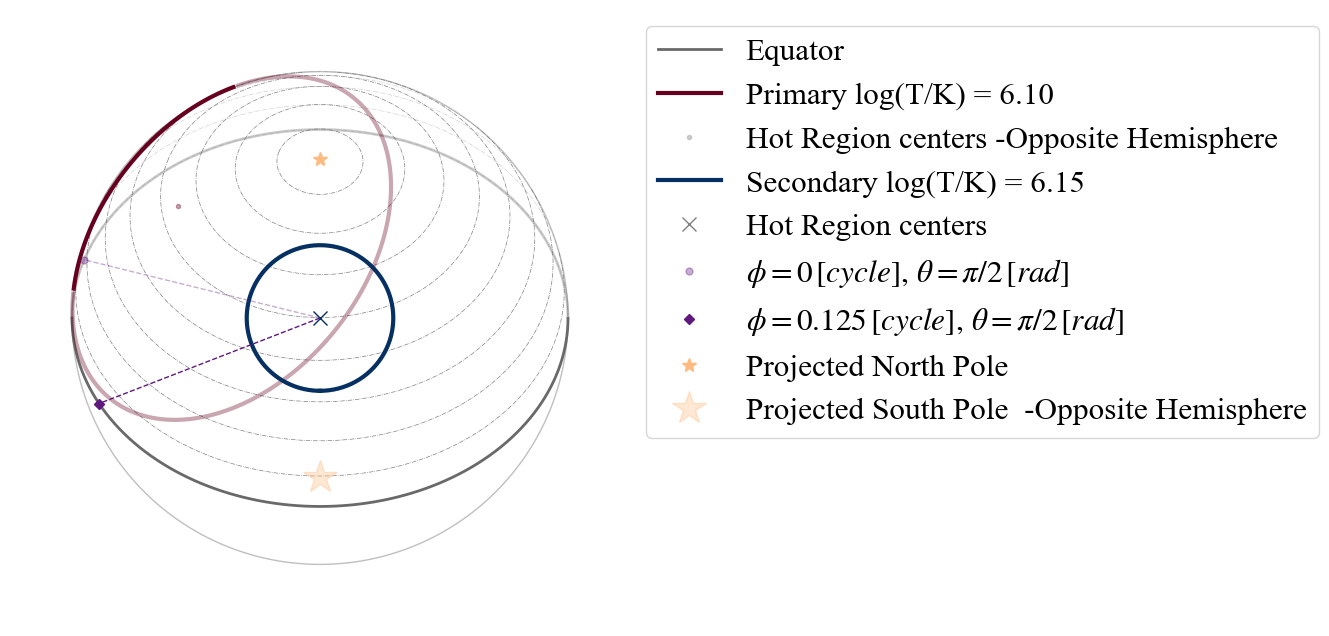

In [50]:
plot_projection_general((P_dictionary_2hsSTU),"ST+ST","S","NP")

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

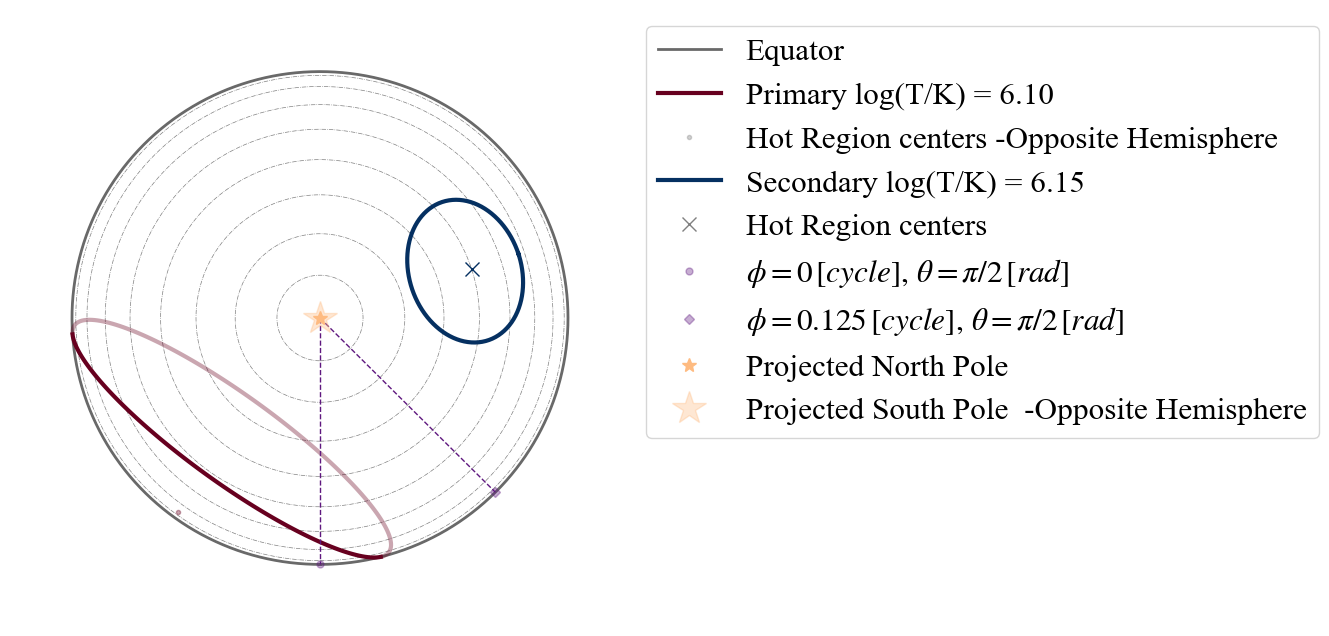

In [51]:
plot_projection_general((P_dictionary_2hsSTU),"ST-U",[0,0,1],"NP")

<h4>CHECK THAT ST-U DOES THE SAME AS ST+ST</h4>

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

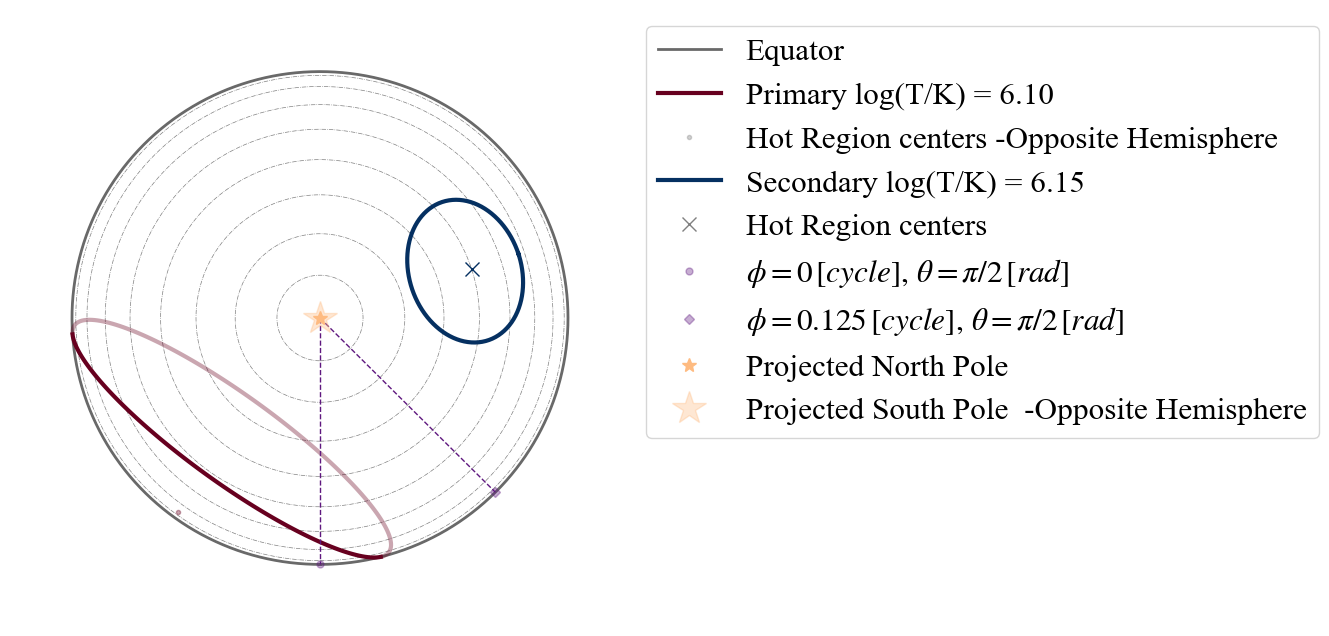

In [52]:
plot_projection_general((P_dictionary_2hsSTU),"ST+ST",[0,0,1],"NP")

<h3>EXAMPLE: Circle of Hell (new prior on PST + another hot spot made by only emitting components) now allowed previously not allowed configurations</h3>

Below we show a couple of configurations that in Riley et al. 2019 were not allowed by the X-PSI prior for the ST+PST; but are now included in our priors. 

In [53]:
# EXAMPLE: ST+PST 
# settings parameter values           
labels = ['mass',   
          'radius', 
          'cos_inclination',
          'p__phase_shift',
          'p__super_colatitude', 
          'p__super_radius', 
          'p__super_temperature', 
          's__phase_shift',
          's__super_colatitude',
          's__super_radius',
          's__super_temperature',
          's__omit_colatitude',
          's__omit_radius',
          's__omit_azimuth',
          'beta',
          'column_density']

values_2hsSTPST = [ 1.4, 15,  0.25,  0.95,  0.7,
        0.3,  6.15,  -0.1,  1.8,  0.9,
        6.1,  1.5, 0.8, -0.2, 9.3,
        0.8]

P_dictionary_2hsSTPST =  dict(zip(labels, values_2hsSTPST))

In [54]:
P_dictionary_2hsSTPST

{'mass': 1.4,
 'radius': 15,
 'cos_inclination': 0.25,
 'p__phase_shift': 0.95,
 'p__super_colatitude': 0.7,
 'p__super_radius': 0.3,
 'p__super_temperature': 6.15,
 's__phase_shift': -0.1,
 's__super_colatitude': 1.8,
 's__super_radius': 0.9,
 's__super_temperature': 6.1,
 's__omit_colatitude': 1.5,
 's__omit_radius': 0.8,
 's__omit_azimuth': -0.2,
 'beta': 9.3,
 'column_density': 0.8}

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

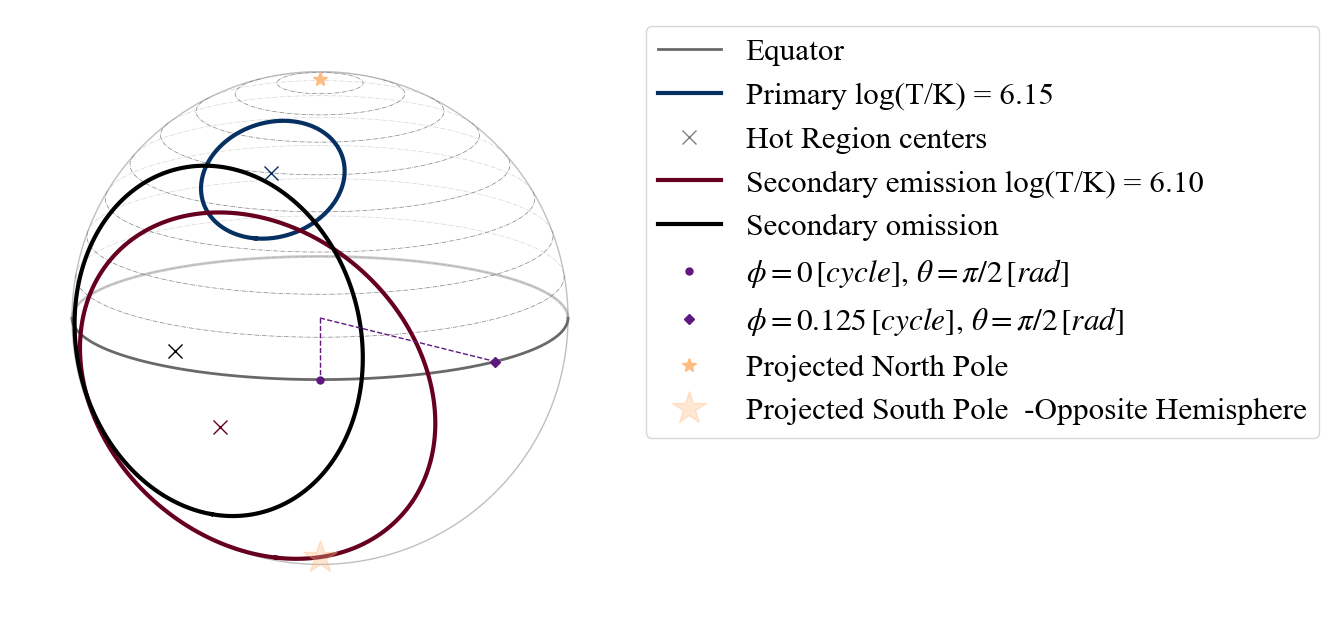

In [55]:
plot_projection_general((P_dictionary_2hsSTPST),"ST+PST","I","NP")

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

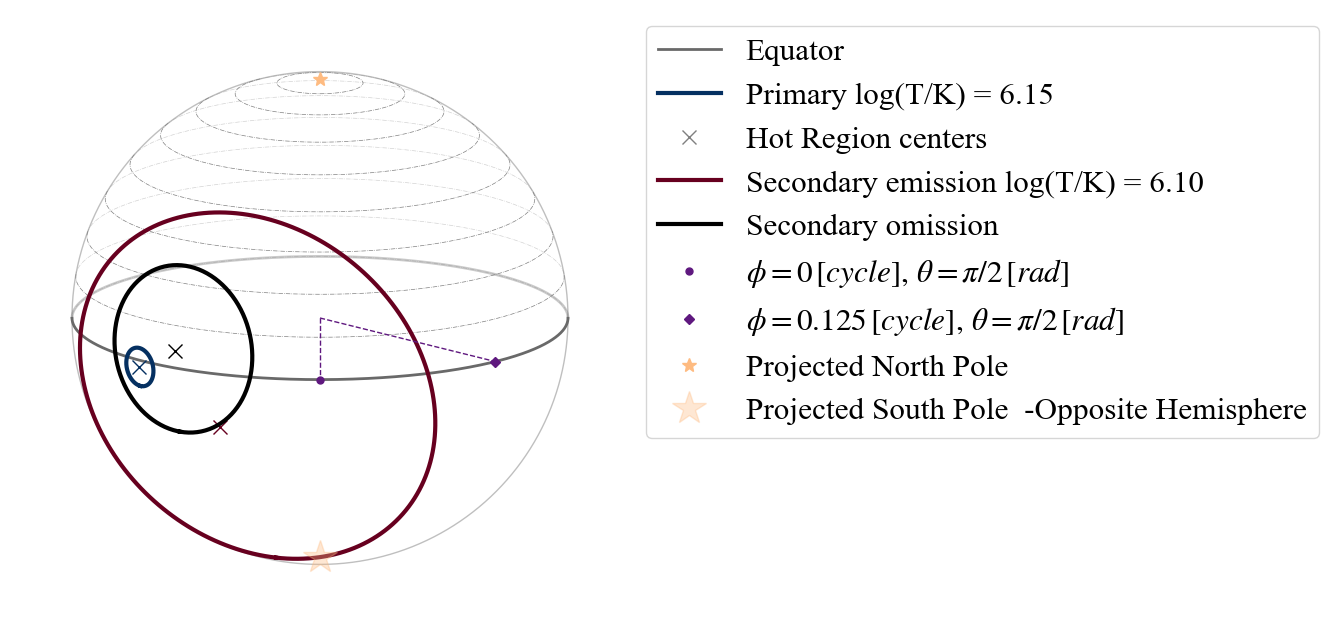

In [56]:
P_dictionary_2hsSTPST['s__omit_radius']=0.35
P_dictionary_2hsSTPST['p__super_colatitude']=1.6
P_dictionary_2hsSTPST['p__super_radius']=0.08
P_dictionary_2hsSTPST['p__phase_shift']=-0.13
plot_projection_general((P_dictionary_2hsSTPST),"ST+PST","I","NP")

In [57]:
# EXAMPLE: PDT+PST 
# settings parameter values  
labels = ['mass',   
          'radius', 
          'cos_inclination',
          'p__phase_shift',
          'p__super_colatitude', 
          'p__super_radius', 
          'p__super_temperature', 
          'p__cede_colatitude',
          'p__cede_radius',
          'p__cede_azimuth',
          'p__cede_temperature',
          's__phase_shift',
          's__super_colatitude',
          's__super_radius',
          's__super_temperature',
          's__omit_colatitude',
          's__omit_radius',
          's__omit_azimuth',
          'beta',
          'column_density']

values_2hsPDTPST = [ 1.4, 15,  0.25,  0.95,  0.7,
        0.3,  6.15, 0.85, 0.31, 0.001, 5.85,  -0.1,  1.8,  0.9,
        6.1,  1.5, 0.8, -0.2, 9.3,
        0.8]

P_dictionary_2hsPDTPST =  dict(zip(labels, values_2hsPDTPST))

In [58]:
P_dictionary_2hsPDTPST

{'mass': 1.4,
 'radius': 15,
 'cos_inclination': 0.25,
 'p__phase_shift': 0.95,
 'p__super_colatitude': 0.7,
 'p__super_radius': 0.3,
 'p__super_temperature': 6.15,
 'p__cede_colatitude': 0.85,
 'p__cede_radius': 0.31,
 'p__cede_azimuth': 0.001,
 'p__cede_temperature': 5.85,
 's__phase_shift': -0.1,
 's__super_colatitude': 1.8,
 's__super_radius': 0.9,
 's__super_temperature': 6.1,
 's__omit_colatitude': 1.5,
 's__omit_radius': 0.8,
 's__omit_azimuth': -0.2,
 'beta': 9.3,
 'column_density': 0.8}

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

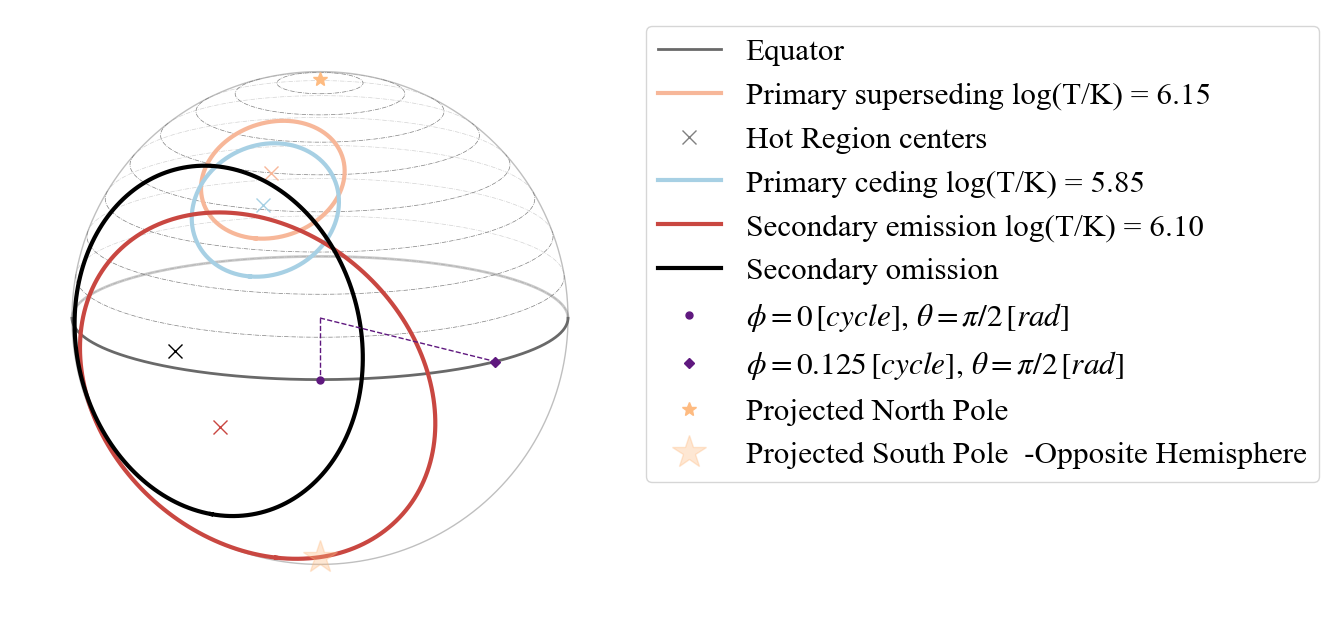

In [59]:
plot_projection_general((P_dictionary_2hsPDTPST),"PDT+PST","I","NP")

YOU ARE USING A 2 HOT SPOT MODEL


<AxesSubplot: >

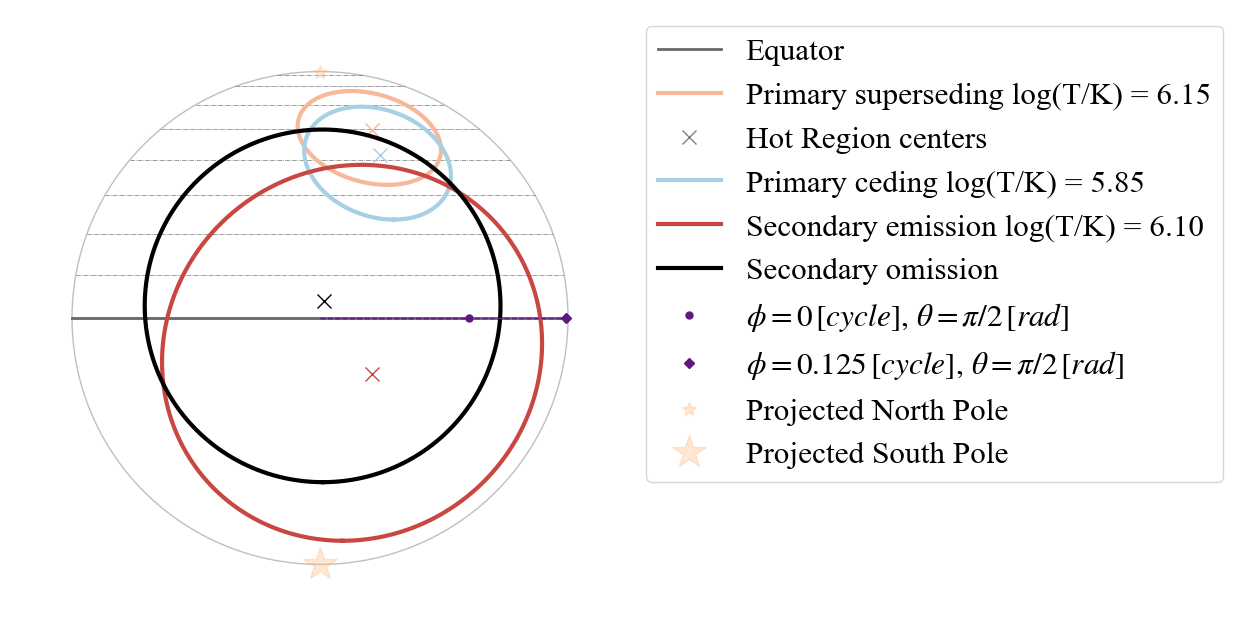

In [60]:
plot_projection_general((P_dictionary_2hsPDTPST),"PDT+PST",[-0.8,-0.2,0.],"NP")